In [94]:
import scanpy as sc
import squidpy as sq
import NaiveDE
import SpatialDE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80, facecolor="white")

In [7]:
adata = sc.read("../../example/spatialDE/visium_hne.h5ad")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [190]:
coord=pd.read_csv("../important_processed_data/4.6_bayes_subset_coord.csv",index_col=0)

In [193]:
coord=coord.iloc[:,2:8]

In [197]:
coord=coord.drop_duplicates()

In [198]:
coord.index=coord["spot"]

In [211]:
coord.loc[stGingival.obs_names]["idents"]

subspot_76.5           sulcular_epi
subspot_176.4                   EBL
subspot_52.2              cornified
subspot_139.6    gingiva progenitor
subspot_60.6                    IBL
                        ...        
subspot_182.5       stratum corneum
subspot_60.5                    IBL
subspot_394.6      spinous+granular
subspot_374.1       stratum corneum
subspot_406.5       stratum corneum
Name: idents, Length: 1447, dtype: object

In [217]:
coord.iloc[:,[2,3]]

imagerow     imagecol
spot                                   
subspot_76.5   2205.972995  1175.147325
subspot_176.4  2205.972995  1492.366627
subspot_52.2   1426.923423  1333.756976
subspot_139.6  1560.274250  1321.556234
subspot_60.6   2381.434610  1211.749552
...                    ...          ...
subspot_182.5  1553.255786  1138.545098
subspot_60.5   2353.360752  1211.749552
subspot_394.6  1981.382127  1028.738417
subspot_374.1  1391.831099  1297.154749
subspot_406.5  1742.754330  1028.738417

[1447 rows x 2 columns]

In [209]:
stGingival=stGingival[coord.index]

In [184]:
stGingival.obs_names

Index(['subspot_1.1', 'subspot_2.1', 'subspot_5.1', 'subspot_6.1',
       'subspot_7.1', 'subspot_8.1', 'subspot_12.1', 'subspot_13.1',
       'subspot_14.1', 'subspot_16.1',
       ...
       'subspot_403.6', 'subspot_405.6', 'subspot_406.6', 'subspot_408.6',
       'subspot_409.6', 'subspot_410.6', 'subspot_412.6', 'subspot_413.6',
       'subspot_414.6', 'subspot_415.6'],
      dtype='object', length=1448)

In [212]:
stGingival.obs["ident"]=coord.loc[stGingival.obs_names]["idents"]

/tmp/ipykernel_1544215/3808206262.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  stGingival.obs["ident"]=coord.loc[stGingival.obs_names]["idents"]


In [225]:
stGingival.obsm["spatial"]=np.array(coord.iloc[:,[3,2]])

In [19]:
adata.uns["spatial"]

{'V1_Adult_Mouse_Brain': {'images': {'hires': array([[[0.50980395, 0.52156866, 0.49411765],
           [0.50980395, 0.5176471 , 0.49411765],
           [0.50980395, 0.5176471 , 0.5019608 ],
           ...,
           [0.5019608 , 0.5137255 , 0.49019608],
           [0.5019608 , 0.5137255 , 0.49803922],
           [0.5019608 , 0.50980395, 0.49411765]],
   
          [[0.50980395, 0.5176471 , 0.49803922],
           [0.5137255 , 0.52156866, 0.49411765],
           [0.50980395, 0.5176471 , 0.49803922],
           ...,
           [0.49803922, 0.5137255 , 0.4862745 ],
           [0.49803922, 0.50980395, 0.49411765],
           [0.5019608 , 0.5137255 , 0.5019608 ]],
   
          [[0.5058824 , 0.5176471 , 0.49019608],
           [0.5137255 , 0.52156866, 0.5019608 ],
           [0.5058824 , 0.52156866, 0.5019608 ],
           ...,
           [0.5019608 , 0.5137255 , 0.49803922],
           [0.5019608 , 0.50980395, 0.49411765],
           [0.5058824 , 0.5137255 , 0.49803922]],
   
          ..

In [12]:
adata.obs["array_row"]

AAACAAGTATCTCCCA-1    50
AAACAATCTACTAGCA-1     3
AAACACCAATAACTGC-1    59
AAACAGAGCGACTCCT-1    14
AAACCGGGTAGGTACC-1    42
                      ..
TTGTTGTGTGTCAAGA-1    31
TTGTTTCACATCCAGG-1    58
TTGTTTCATTAGTCTA-1    60
TTGTTTCCATACAACT-1    45
TTGTTTGTGTAAATTC-1     7
Name: array_row, Length: 2688, dtype: int64

In [5]:
adata=sc.read_h5ad("../3.16_cytoscpace/processed_data/spatial_GSE2.h5ad")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [48]:
adata.obsm["spatial"].shape

(2688, 2)

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  func(*args, **kwargs)
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


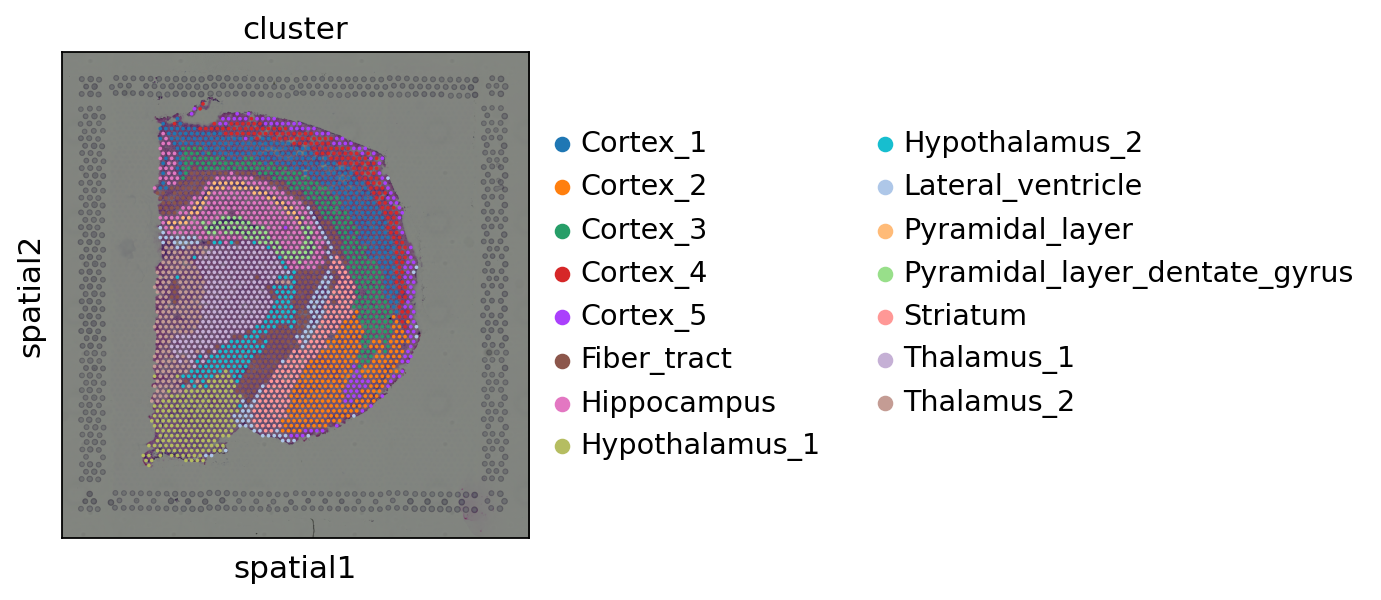

In [11]:
sq.pl.spatial_scatter(adata, color="cluster")

In [180]:
adata.X[1:10,1:10].toarray()

array([[0.        , 1.0922161 , 1.0922161 , 1.0922161 , 0.        ,
        1.6017576 , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.9803591 , 0.        ,
        0.6057939 , 0.        , 0.        , 0.9803591 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        2.4223483 , 0.        , 0.        , 0.9977047 ],
       [0.        , 0.99697125, 0.        , 0.6179012 , 0.        ,
        0.        , 0.        , 0.        , 1.4861674 ],
       [0.        , 1.0170915 , 0.632638  , 0.632638  , 0.        ,
        1.510784  , 0.        , 0.        , 0.632638  ],
       [0.37266755, 0.8564579 , 0.8564579 , 1.3109268 , 0.8564579 ,
        1.1811161 , 0.6435385 , 0.        , 1.3109268 ],
       [0.        , 0.5269402 , 0.        , 0.87024   , 0.5269402 ,
        1.6414115 , 0.        , 0.        , 1.6414115 ],
       [0.5774457 , 1.4172912 , 0.        , 0.5774457 , 1.2073011 ,
        0.        , 0.        , 0.        , 1.2073011 ],


In [177]:
adata.obsm["spatial"]

array([[8230, 7237],
       [4170, 1611],
       [2519, 8315],
       ...,
       [3276, 8435],
       [3069, 6639],
       [4720, 2090]])

In [23]:
stBayes=pd.read_table("../3.16_cytoscpace/input/stMat_bayes.txt",index_col=0)

In [29]:
stCoord=pd.read_table("../3.16_cytoscpace/input/stCoord_bayes.txt",index_col=0)

In [31]:
stCoord["row"]

SpotID
subspot_1.1      35.333333
subspot_2.1      24.333333
subspot_5.1      28.333333
subspot_6.1      29.333333
subspot_7.1      23.333333
                   ...    
subspot_410.6    30.000000
subspot_412.6    22.000000
subspot_413.6    22.000000
subspot_414.6    24.000000
subspot_415.6    31.000000
Name: row, Length: 1448, dtype: float64

In [27]:
stGingival=sc.AnnData(stBayes.T)

In [227]:
stGingival.obsm["spatial"]=np.array(stCoord.loc[stGingival.obs_names])
stGingival.uns["spatial"]=adata.uns["spatial"]

In [222]:
stCoord.loc[stGingival.obs_names]

row        col
subspot_76.5   25.000000  37.666667
subspot_176.4  33.666667  37.666667
subspot_52.2   29.333333  74.666667
subspot_139.6  29.000000  68.333333
subspot_60.6   26.000000  29.333333
...                  ...        ...
subspot_182.5  24.000000  68.666667
subspot_60.5   26.000000  30.666667
subspot_394.6  21.000000  48.333333
subspot_374.1  28.333333  76.333333
subspot_406.5  21.000000  59.666667

[1447 rows x 2 columns]

In [50]:
stGingival.obs["in_tissue"]=1
stGingival.obs["array_row"]=stCoord["row"]
stGingival.obs["array_col"]=stCoord["col"]

In [87]:
stGingival.uns['spatial']["V1_Adult_Mouse_Brain"]["images"]["hires"].shape

(2000, 1921, 3)

In [162]:
stGingival.uns['spatial']["V1_Adult_Mouse_Brain"]["scalefactors"]["tissue_hires_scalef"]=35

In [163]:
np.array(stCoord)-40

array([[ -4.66666667,  39.33333333],
       [-15.66666667,  22.33333333],
       [-11.66666667,   2.33333333],
       ...,
       [-18.        ,   1.33333333],
       [-16.        ,  23.33333333],
       [ -9.        ,  36.33333333]])

In [168]:
stGingival.obsm["spatial"]=np.array(stCoord)-15

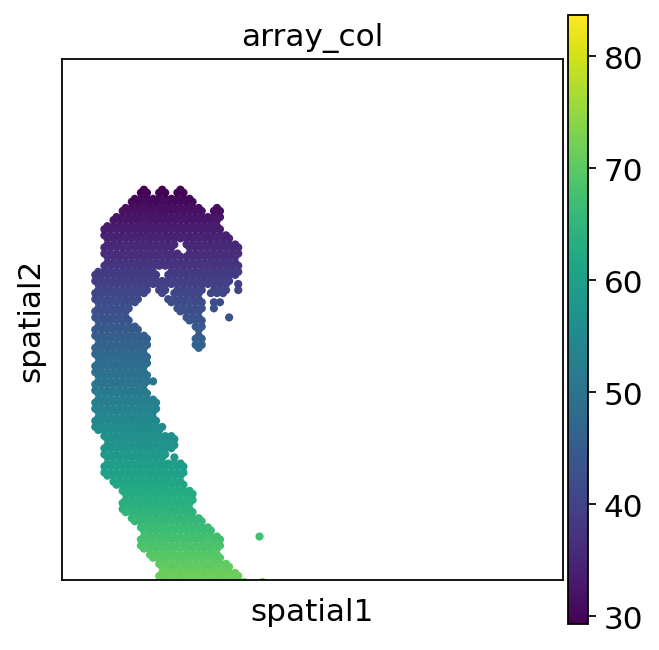

In [169]:
sq.pl.spatial_scatter(stGingival,img_alpha=0,color="array_col",size=0.01)

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


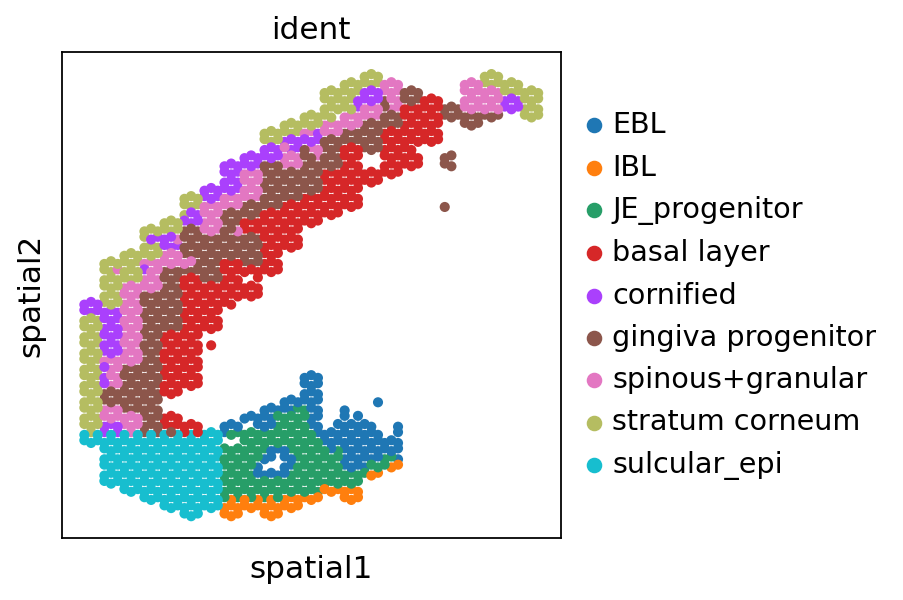

In [228]:
sc.pl.embedding(stGingival,basis="spatial",color="ident")

In [229]:
## preprocess datasets

In [231]:
sc.pp.normalize_total(stGingival, inplace=True)
sc.pp.log1p(stGingival)
sc.pp.highly_variable_genes(stGingival, flavor="seurat", n_top_genes=2000)

normalizing counts per cell
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


In [232]:
sc.pp.pca(stGingival)
sc.pp.neighbors(stGingival)
sc.tl.umap(stGingival)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50


/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/si

    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:29)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


Creating graph using `grid` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating neighborhood enrichment using `1` core(s)


  0%|          | 0/1000 [00:00<?, ?/s]

Adding `adata.uns['ident_nhood_enrichment']`
Finish (0:00:01)


/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/squidpy/pl/_utils.py:557: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row_labels = adata.obs[key][row_order]


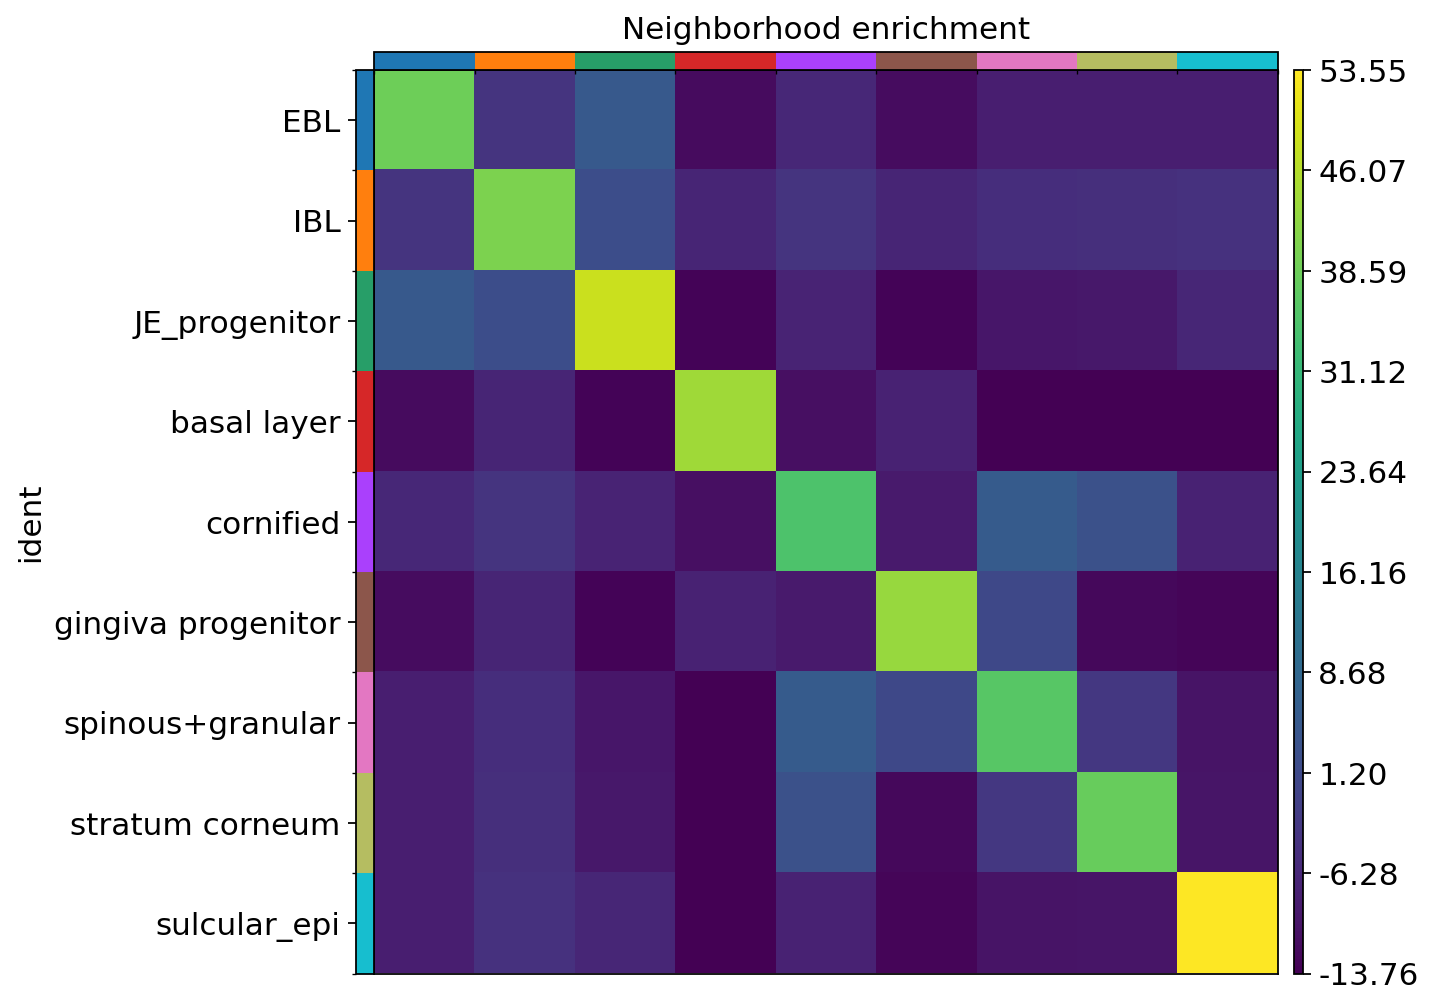

In [233]:
sq.gr.spatial_neighbors(stGingival)
sq.gr.nhood_enrichment(stGingival, cluster_key="ident")
sq.pl.nhood_enrichment(stGingival, cluster_key="ident")

In [235]:
sq.gr.spatial_autocorr(
    stGingival,
    mode="moran",
    n_perms=100,
    n_jobs=1,
)

Calculating moran's statistic for `100` permutations using `1` core(s)


  0%|          | 0/100 [00:00<?, ?/s]

Adding `adata.uns['moranI']`
Finish (0:00:07)


In [237]:
stGingival.uns["moranI"].head(10)

I  pval_norm  var_norm  pval_z_sim  pval_sim   var_sim  \
Dusp10   0.903833        0.0  0.000313         0.0  0.009901  0.000581   
Bcat1    0.903661        0.0  0.000313         0.0  0.009901  0.000548   
Rnf224   0.901051        0.0  0.000313         0.0  0.009901  0.000562   
Slc28a3  0.900462        0.0  0.000313         0.0  0.009901  0.000565   
Apol8    0.899564        0.0  0.000313         0.0  0.009901  0.000537   
Muc1     0.898982        0.0  0.000313         0.0  0.009901  0.000587   
Il19     0.898971        0.0  0.000313         0.0  0.009901  0.000556   
Ly6k     0.898723        0.0  0.000313         0.0  0.009901  0.000552   
Spink5   0.896717        0.0  0.000313         0.0  0.009901  0.000721   
Hs3st1   0.896631        0.0  0.000313         0.0  0.009901  0.000540   

         pval_norm_fdr_bh  pval_z_sim_fdr_bh  pval_sim_fdr_bh  
Dusp10                0.0                0.0         0.009901  
Bcat1                 0.0                0.0         0.009901  
Rnf224                0.0                0.0         0.009901  
Slc28a3               0.0                0.0         0.009901  
Apol8                 0.0                0.0         0.009901  
Muc1                  0.0                0.0         0.009901  
Il19                  0.0                0.0         0.009901  
Ly6k                  0.0                0.0         0.009901  
Spink5                0.0                0.0         0.009901  
Hs3st1                0.0                0.0         0.009901

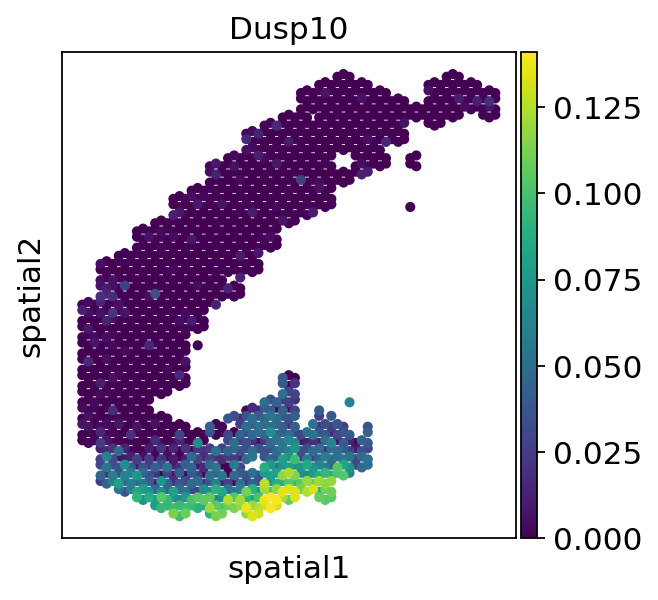

In [238]:
sc.pl.embedding(stGingival,basis="spatial",color="Dusp10")

## apply spatialDE

In [240]:
stGingival.var_names

Index(['Samd11', 'Noc2l', 'Klhl17', 'Plekhn1', 'Perm1', 'Isg15', 'Agrn',
       'Rnf223', '9430015G10Rik', 'Ttll10',
       ...
       'F8a', 'Fundc2', 'Cmc4', 'Mtcp1', 'Brcc3', 'Vbp1', 'Tmlhe', 'Spry3',
       'Vamp7', 'Il9r'],
      dtype='object', name='GENES', length=13728)

In [239]:
counts = sc.get.obs_df(stGingival, keys=list(stGingival.var_names), use_raw=False)

AttributeError: 'NoneType' object has no attribute 'var'

In [250]:
counts=stBayes.loc[:,stGingival.obs_names]

In [351]:
stGingival_raw=sc.AnnData(counts.T)

In [352]:
sc.pp.calculate_qc_metrics(stGingival_raw, inplace=True)

In [353]:
stGingival_raw

AnnData object with n_obs × n_vars = 1447 × 13728
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [354]:
total_counts = sc.get.obs_df(stGingival_raw, keys=["total_counts"])

In [355]:
counts=counts.T

In [356]:
norm_expr = NaiveDE.stabilize(counts.T).T

In [363]:
resid_expr = NaiveDE.regress_out(total_counts, norm_expr.T, "np.log(total_counts)").T

In [364]:
resid_expr

GENES            Samd11     Noc2l    Klhl17   Plekhn1     Perm1     Isg15  \
subspot_76.5   0.178407  0.330171  0.163570  0.204806  0.178407  0.173326   
subspot_176.4  0.178407  0.323617  0.164147  0.219679  0.178407  0.164318   
subspot_52.2   0.178407  0.303488  0.163300  0.300325  0.178407  0.162128   
subspot_139.6  0.178407  0.324206  0.162995  0.218477  0.178407  0.164417   
subspot_60.6   0.178407  0.309567  0.163199  0.234027  0.178407  0.170954   
...                 ...       ...       ...       ...       ...       ...   
subspot_182.5  0.178407  0.310501  0.161488  0.273485  0.178407  0.160845   
subspot_60.5   0.178407  0.312345  0.161061  0.284484  0.178407  0.159329   
subspot_394.6  0.178407  0.315341  0.163432  0.280613  0.178407  0.161439   
subspot_374.1  0.178407  0.305196  0.161641  0.281903  0.178407  0.160482   
subspot_406.5  0.178407  0.306695  0.164942  0.337267  0.178407  0.160694   

GENES              Agrn    Rnf223  9430015G10Rik    Ttll10  ...       F8a  \
subspot_76.5  -1.063492  0.178407       0.170604 -0.153138  ...  0.226180   
subspot_176.4 -1.114941  0.178407       0.163310 -0.160087  ...  0.215275   
subspot_52.2  -1.174614  0.178407       0.163075 -0.158497  ...  0.213646   
subspot_139.6 -1.124529  0.178407       0.163525 -0.156677  ...  0.212950   
subspot_60.6  -1.077640  0.178407       0.162341 -0.132421  ...  0.212088   
...                 ...       ...            ...       ...  ...       ...   
subspot_182.5 -1.180437  0.178407       0.165061 -0.163641  ...  0.208529   
subspot_60.5  -1.270421  0.178407       0.161989 -0.118047  ...  0.209904   
subspot_394.6 -1.136062  0.178407       0.163512 -0.156973  ...  0.209623   
subspot_374.1 -1.189781  0.178407       0.162866 -0.165399  ...  0.208223   
subspot_406.5 -1.158452  0.178407       0.162682 -0.175662  ...  0.208575   

GENES            Fundc2      Cmc4     Mtcp1     Brcc3      Vbp1     Tmlhe  \
subspot_76.5   0.150995  0.154467  0.186235  0.177388  0.191594  0.144560   
subspot_176.4  0.157023  0.162901  0.177871  0.177683  0.186879  0.154696   
subspot_52.2   0.156662  0.160884  0.177862  0.174911  0.185311  0.147970   
subspot_139.6  0.153175  0.155582  0.177878  0.178882  0.192276  0.148511   
subspot_60.6   0.148943  0.152674  0.177836  0.175312  0.192087  0.141431   
...                 ...       ...       ...       ...       ...       ...   
subspot_182.5  0.150167  0.153743  0.178558  0.176061  0.185341  0.142968   
subspot_60.5   0.154250  0.152110  0.177824  0.175973  0.185800  0.141194   
subspot_394.6  0.153455  0.156817  0.177878  0.175374  0.185114  0.145842   
subspot_374.1  0.149904  0.153513  0.177855  0.175440  0.185655  0.142638   
subspot_406.5  0.149567  0.157443  0.177848  0.174822  0.185488  0.142215   

GENES             Spry3     Vamp7      Il9r  
subspot_76.5   0.178407  0.213368  0.178407  
subspot_176.4  0.178407  0.202069  0.178407  
subspot_52.2   0.178407  0.207864  0.178407  
subspot_139.6  0.178407  0.210356  0.178407  
subspot_60.6   0.178407  0.225059  0.178407  
...                 ...       ...       ...  
subspot_182.5  0.178407  0.202541  0.178407  
subspot_60.5   0.178407  0.205880  0.178407  
subspot_394.6  0.178407  0.206266  0.178407  
subspot_374.1  0.178407  0.205901  0.178407  
subspot_406.5  0.178407  0.213236  0.178407  

[1447 rows x 13728 columns]

In [367]:


results_sample = SpatialDE.run(stGingival.obsm["spatial"], resid_expr)

Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/13728 [00:00<?, ?it/s]

  0%|          | 0/13728 [00:00<?, ?it/s]

  0%|          | 0/13728 [00:00<?, ?it/s]

  0%|          | 0/13728 [00:00<?, ?it/s]

  0%|          | 0/13728 [00:00<?, ?it/s]

  0%|          | 0/13728 [00:00<?, ?it/s]

  0%|          | 0/13728 [00:00<?, ?it/s]

  0%|          | 0/13728 [00:00<?, ?it/s]

  0%|          | 0/13728 [00:00<?, ?it/s]

  0%|          | 0/13728 [00:00<?, ?it/s]

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/SpatialDE/base.py:310: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  model_results = model_results[model_results.groupby(['g'])['max_ll'].transform(max) == model_results['max_ll']]
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/SpatialDE/util.py:19: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  pv = pv.ravel()  # flattens the array in place, more efficient than flatten()


In [368]:
results_sample

FSV  M              g          l  max_delta        max_ll  \
0      0.648430  4            Mpz   0.235702   0.542072   3600.653729   
1      0.799941  4  C130074G19Rik   0.235702   0.250039   4559.083163   
2      0.750185  4           Dazl   0.235702   0.332935   7110.497479   
3      0.914358  4          Cetn3   0.235702   0.093644   6256.860160   
4      0.928536  4        Mettl24   0.235702   0.076948   6485.794046   
...         ... ..            ...        ...        ...           ...   
13723  0.345295  4          Zfp92  14.415135   1.009104  50393.756745   
13724  0.345295  4           Ccnq  14.415135   1.009104  50393.756745   
13725  0.345295  4          Abcd1  14.415135   1.009104  50393.756745   
13726  0.345295  4          Avpr2  14.415135   1.009104  50393.756745   
13727  0.345295  4          Spry3  14.415135   1.009104  50393.756745   

       max_mu_hat  max_s2_t_hat model     n    s2_FSV  s2_logdelta      time  \
0       -0.009685      0.000315    SE  1447  0.033099     0.717791  0.007176   
1        0.113808      0.008432    SE  1447  0.091676     3.571138  0.008229   
2        0.167462      0.017154    SE  1447  0.058482     1.746451  0.007068   
3        0.171526      0.021095    SE  1447  0.183762    25.546084  0.009546   
4        0.179647      0.023417    SE  1447  0.268569    50.758884  0.011112   
...           ...           ...   ...   ...       ...          ...       ...   
13723    0.178407      0.000066    SE  1447  0.030242     0.664716  0.019987   
13724    0.178407      0.000066    SE  1447  0.030242     0.664716  0.019942   
13725    0.178407      0.000066    SE  1447  0.030242     0.664716  0.019869   
13726    0.178407      0.000066    SE  1447  0.030242     0.664716  0.019999   
13727    0.178407      0.000066    SE  1447  0.030242     0.664716  0.020042   

                 BIC   max_ll_null          LLR      pval      qval  
0       -7172.198467   3595.975159     4.678570  0.030541  0.037262  
1       -9089.057336   4552.500228     6.582936  0.010296  0.012568  
2      -14191.885968   7104.716223     5.781257  0.016198  0.019766  
3      -12484.611330   6245.892434    10.967727  0.000927  0.001132  
4      -12942.479100   6474.313370    11.480675  0.000703  0.000859  
...              ...           ...          ...       ...       ...  
13723 -100758.404499  52282.683691 -1888.926946  1.000000  1.000000  
13724 -100758.404499  52282.683691 -1888.926946  1.000000  1.000000  
13725 -100758.404499  52282.683691 -1888.926946  1.000000  1.000000  
13726 -100758.404499  52282.683691 -1888.926946  1.000000  1.000000  
13727 -100758.404499  52282.683691 -1888.926946  1.000000  1.000000  

[13728 rows x 18 columns]

In [369]:
top10 = results_sample.sort_values("qval").head(10)[["g", "l", "qval"]]
top10

g         l  qval
6863    Glyctk  3.658758   0.0
7417  Ppargc1b  3.658758   0.0
7418   Slc26a2  3.658758   0.0
7419      Arsi  3.658758   0.0
7420      Cd74  3.658758   0.0
7421     Ndst1  3.658758   0.0
7422     Synpo  3.658758   0.0
7423     Smim3  3.658758   0.0
7424      Gpx3  3.658758   0.0
7425     Tnip1  3.658758   0.0

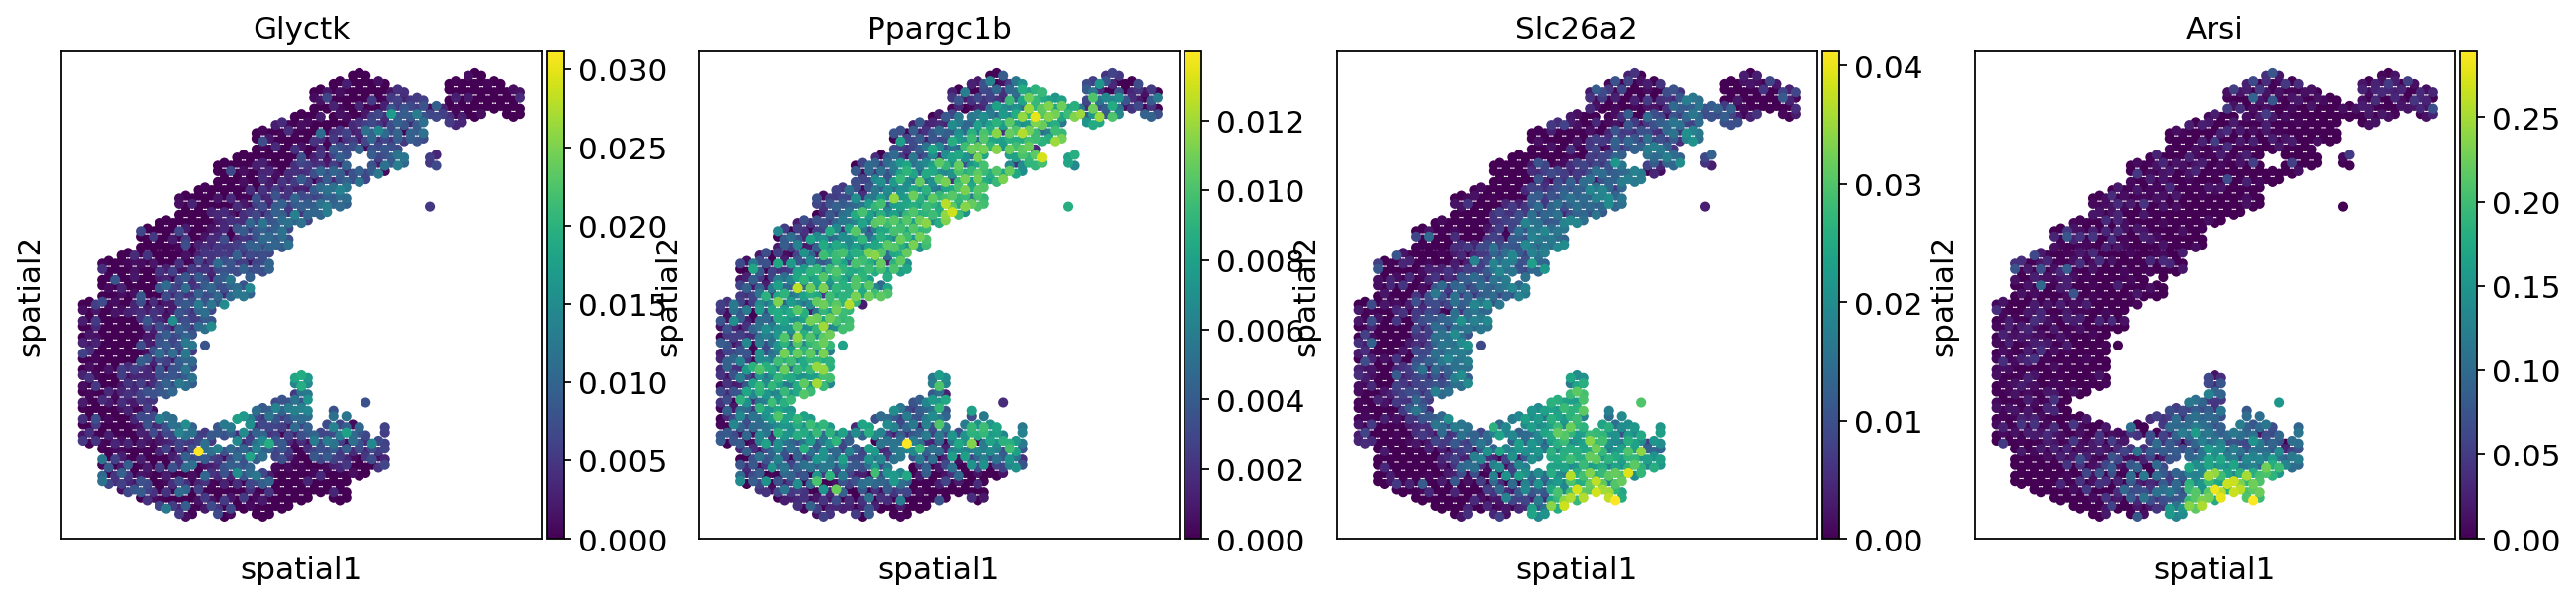

In [370]:
sc.pl.embedding(stGingival,basis="spatial",color=["Glyctk","Ppargc1b","Slc26a2","Arsi"])

In [371]:
sign_results = results_sample.query('qval < 0.05')

In [373]:
sign_results['l'].value_counts()

l
3.658758     5017
1.843280     3960
0.928643     1792
7.262334      388
0.467850       70
14.415135      14
0.235702       11
Name: count, dtype: int64

In [ ]:
histology_results, patterns = SpatialDE.aeh.spatial_patterns(stGingival.obsm["spatial"], resid_expr, sign_results, C=8, l=1.8, verbosity=1)

iter 0, ELBO: -5.26e+11
iter 1, ELBO: -2.63e+11, delta_ELBO: 2.63e+11
iter 2, ELBO: -2.63e+11, delta_ELBO: 3.34e+06
iter 3, ELBO: -2.63e+11, delta_ELBO: 3.01e+06
iter 4, ELBO: -2.63e+11, delta_ELBO: 4.85e+05
iter 5, ELBO: -2.63e+11, delta_ELBO: 1.06e+05
iter 6, ELBO: -2.63e+11, delta_ELBO: 3.21e+04
iter 7, ELBO: -2.63e+11, delta_ELBO: 1.28e+04
iter 8, ELBO: -2.63e+11, delta_ELBO: 3.05e+03
iter 9, ELBO: -2.63e+11, delta_ELBO: 1.12e+04
iter 10, ELBO: -2.63e+11, delta_ELBO: 1.77e+04
iter 11, ELBO: -2.63e+11, delta_ELBO: 2.52e+04
iter 12, ELBO: -2.63e+11, delta_ELBO: 8.79e+03
iter 13, ELBO: -2.63e+11, delta_ELBO: 6.50e+03
iter 14, ELBO: -2.63e+11, delta_ELBO: 4.14e+03


In [391]:
sample_info=pd.DataFrame(stGingival.obsm["spatial"])

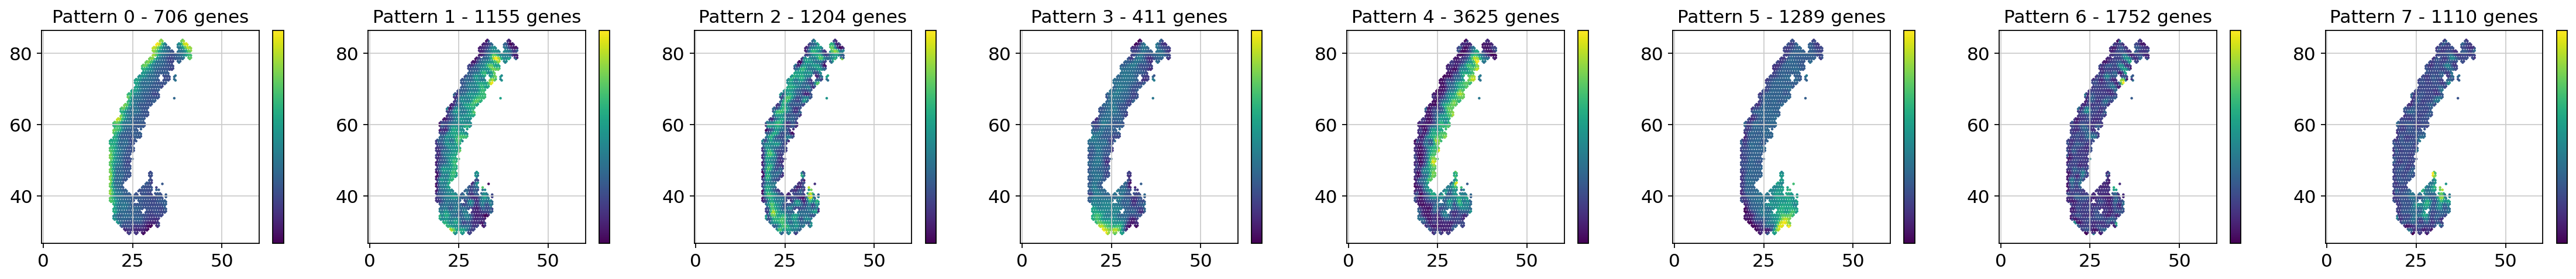

In [407]:
plt.figure(figsize=(35, 3))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.scatter(sample_info[0], sample_info[1], c=patterns[i],s=1);
    plt.axis('equal')
    plt.title('Pattern {} - {} genes'.format(i, histology_results.query('pattern == @i').shape[0] ))
    plt.colorbar(ticks=[]);
plt.savefig("../4.6_spatial_pattern/spatialDE/4.7_pattern.pdf")

In [408]:
histology_results.to_csv("../4.6_spatial_pattern/spatialDE/histology_results.csv")
patterns.to_csv("../4.6_spatial_pattern/spatialDE/patterns.csv")

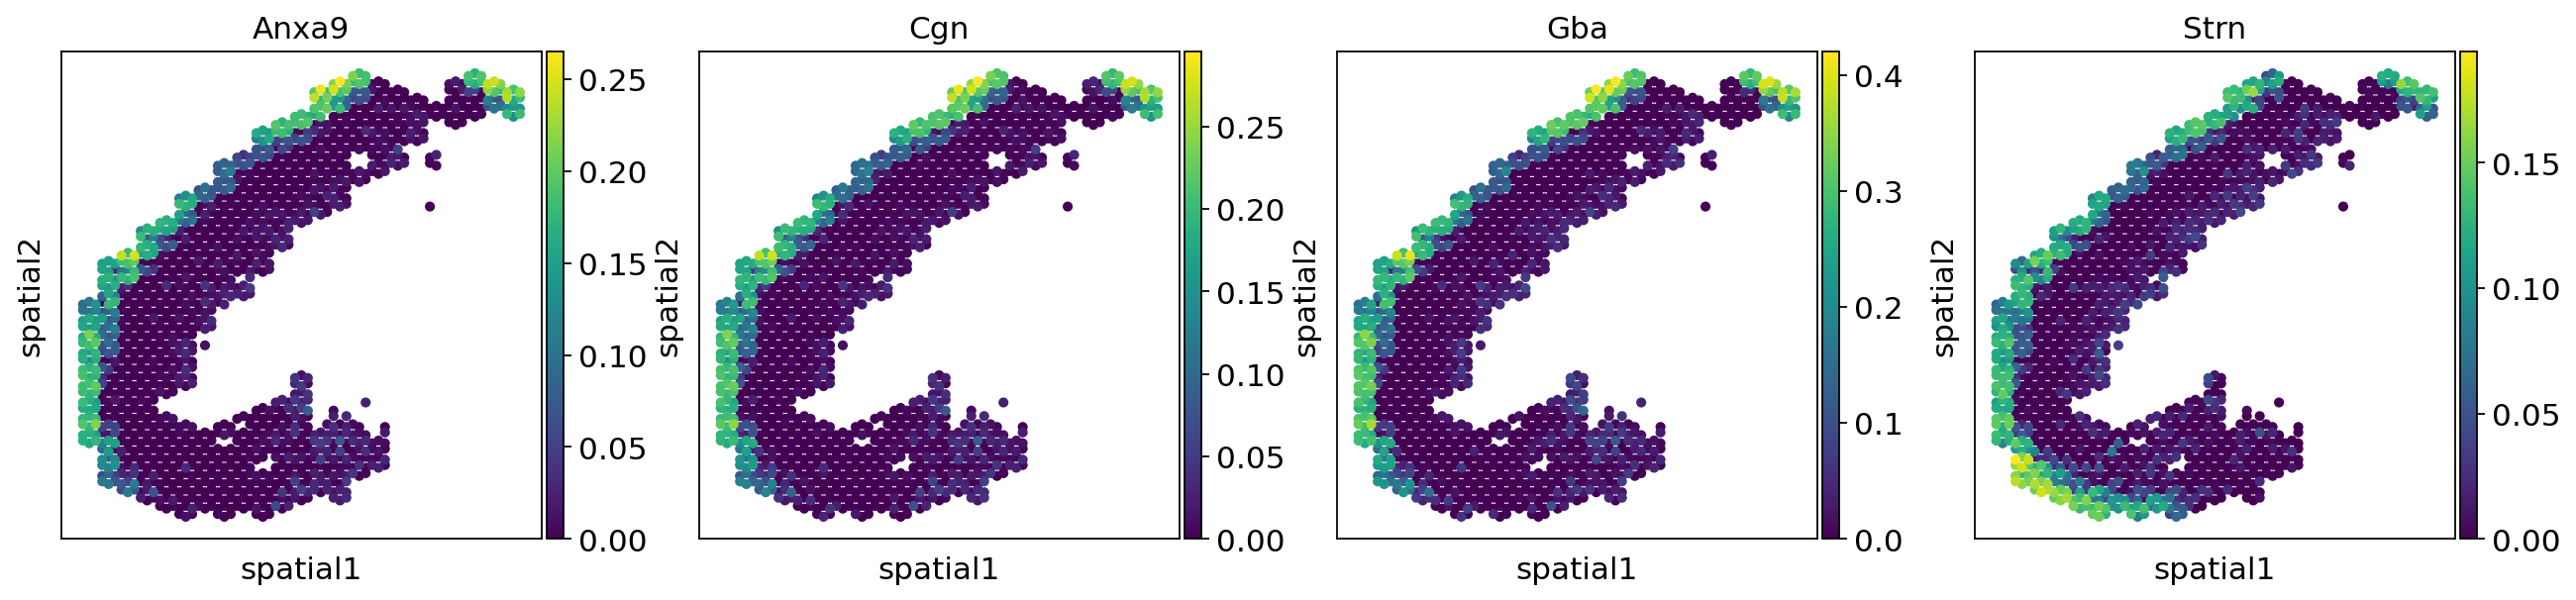

In [410]:
sc.pl.embedding(stGingival,basis="spatial",color=["Anxa9","Cgn","Gba","Strn"])

In [414]:
patterns.columns="parttern" + patterns.columns.astype("str")

In [423]:
stGingival.obs[patterns.columns] = patterns

In [431]:
histology_results=histology_results.set_index("g")
stGingival.var[[histology_results.columns]]=np.nan
stGingival.var.loc[histology_results.index,histology_results.columns] =histology_results

In [453]:
stGingival.var

highly_variable         means  dispersions  dispersions_norm  \
GENES                                                                   
Samd11             False  1.000000e-12          NaN               NaN   
Noc2l              False  2.384056e-02    -4.661453          0.088787   
Klhl17             False  1.963421e-03    -6.490150         -1.147563   
Plekhn1             True  5.111480e-02    -3.176694          1.092607   
Perm1              False  1.000000e-12          NaN               NaN   
...                  ...           ...          ...               ...   
Vbp1               False  5.613878e-03    -5.138544         -0.233766   
Tmlhe              False  4.463004e-03    -5.330307         -0.363413   
Spry3              False  1.000000e-12          NaN               NaN   
Vamp7              False  7.638087e-03    -4.993060         -0.135406   
Il9r               False  1.000000e-12          NaN               NaN   

         pattern  membership  
GENES                         
Samd11       NaN         NaN  
Noc2l        4.0         1.0  
Klhl17       5.0         1.0  
Plekhn1      0.0         1.0  
Perm1        NaN         NaN  
...          ...         ...  
Vbp1         4.0         1.0  
Tmlhe        4.0         1.0  
Spry3        NaN         NaN  
Vamp7        6.0         1.0  
Il9r         NaN         NaN  

[13728 rows x 6 columns]

In [454]:
stGingival.write_h5ad("../important_processed_data/4.7_gingival_st_bayes.h5ad")

## Find genes that most correlated with pattern

In [372]:
sign_results

FSV  M              g          l  max_delta       max_ll  \
0      0.648430  4            Mpz   0.235702   0.542072  3600.653729   
1      0.799941  4  C130074G19Rik   0.235702   0.250039  4559.083163   
2      0.750185  4           Dazl   0.235702   0.332935  7110.497479   
3      0.914358  4          Cetn3   0.235702   0.093644  6256.860160   
4      0.928536  4        Mettl24   0.235702   0.076948  6485.794046   
...         ... ..            ...        ...        ...          ...   
13301  0.781433  4           Palm  14.415135   0.148859  5741.907512   
13317  0.816068  4         Cactin  14.415135   0.119954  6998.991487   
13360  0.779503  4          Mef2b  14.415135   0.150545  6828.489680   
13541  0.758197  4           Get1  14.415135   0.169731  7080.238575   
13602  0.897002  4  5031439G07Rik  14.415135   0.061110  3049.713395   

       max_mu_hat  max_s2_t_hat model     n    s2_FSV  s2_logdelta      time  \
0       -0.009685      0.000315    SE  1447  0.033099     0.717791  0.007176   
1        0.113808      0.008432    SE  1447  0.091676     3.571138  0.008229   
2        0.167462      0.017154    SE  1447  0.058482     1.746451  0.007068   
3        0.171526      0.021095    SE  1447  0.183762    25.546084  0.009546   
4        0.179647      0.023417    SE  1447  0.268569    50.758884  0.011112   
...           ...           ...   ...   ...       ...          ...       ...   
13301    0.099597      0.000159    SE  1447  0.001935     0.067486  0.010911   
13317    0.184283      0.000113    SE  1447  0.000868     0.037714  0.005190   
13360    0.199029      0.000126    SE  1447  0.001241     0.042819  0.011098   
13541    0.176554      0.000094    SE  1447  0.001506     0.046655  0.010719   
13602    0.025240      0.013440    SE  1447  0.000368     0.037844  0.009964   

                BIC  max_ll_null         LLR      pval      qval  
0      -7172.198467  3595.975159    4.678570  0.030541  0.037262  
1      -9089.057336  4552.500228    6.582936  0.010296  0.012568  
2     -14191.885968  7104.716223    5.781257  0.016198  0.019766  
3     -12484.611330  6245.892434   10.967727  0.000927  0.001132  
4     -12942.479100  6474.313370   11.480675  0.000703  0.000859  
...             ...          ...         ...       ...       ...  
13301 -11454.706033  5460.458819  281.448693  0.000000  0.000000  
13317 -13968.873983  6795.112092  203.879395  0.000000  0.000000  
13360 -13627.870369  6706.573732  121.915948  0.000000  0.000000  
13541 -14131.368158  6802.305911  277.932664  0.000000  0.000000  
13602  -6070.317798  2763.836123  285.877272  0.000000  0.000000  

[11252 rows x 18 columns]

In [282]:
stGingival.obsm["spatial"].shape

(1447, 2)

In [283]:
resid_expr

subspot_76.5  subspot_176.4  subspot_52.2  subspot_139.6  \
GENES                                                               
Noc2l       -5.415717      -5.905178     -6.775363      -5.508348   
Klhl17      -5.749582      -5.685692     -5.437510      -5.852794   
Plekhn1     -6.589488      -6.227538     -3.544102      -5.883605   
Isg15       -5.193342      -6.139760     -5.835299      -5.990362   
Agrn        -5.066516      -6.002433     -7.103281      -6.748932   
...               ...            ...           ...            ...   
Mtcp1       -4.456538      -5.700910     -5.597160      -5.672592   
Brcc3       -5.977775      -6.024850     -6.078466      -5.712144   
Vbp1        -5.744296      -6.532125     -6.251206      -5.622446   
Tmlhe       -6.528932      -5.365966     -5.310650      -5.817360   
Vamp7       -5.512263      -7.124348     -5.419959      -5.668988   

         subspot_60.6  subspot_132.3  subspot_194.1  subspot_352.2  \
GENES                                                                
Noc2l       -7.220626      -5.289252      -5.326940      -5.674128   
Klhl17      -5.460519      -6.124907      -5.172459      -5.827203   
Plekhn1     -5.063054      -8.081707      -6.797173      -5.682122   
Isg15       -5.021179      -6.661581      -5.338591      -5.700526   
Agrn        -3.758530      -6.541421      -4.060355      -7.160569   
...               ...            ...            ...            ...   
Mtcp1       -5.640562      -5.673446      -5.658552      -5.364392   
Brcc3       -6.146319      -5.270962      -6.081222      -5.973706   
Vbp1        -5.485200      -5.241771      -6.649108      -5.926031   
Tmlhe       -6.438617      -5.267677      -4.798134      -5.901653   
Vamp7       -4.703621      -6.327116      -6.811704      -5.709173   

         subspot_168.4  subspot_413.3  ...  subspot_292.5  subspot_56.1  \
GENES                                  ...                                
Noc2l        -5.461575      -5.543147  ...      -6.798764     -5.558371   
Klhl17       -5.878299      -5.829363  ...      -5.616311     -5.590905   
Plekhn1      -6.663240      -6.418582  ...      -4.084901     -7.177387   
Isg15        -5.607146      -6.743917  ...      -6.335337     -5.980544   
Agrn         -5.832935      -5.879289  ...      -6.074307     -4.836030   
...                ...            ...  ...            ...           ...   
Mtcp1        -4.672064      -5.687052  ...      -5.619535     -5.708351   
Brcc3        -5.893175      -5.638668  ...      -6.090938     -5.933821   
Vbp1         -6.228229      -5.771486  ...      -6.396228     -6.687894   
Tmlhe        -6.767291      -6.002291  ...      -6.048219     -6.838871   
Vamp7        -7.092085      -6.670829  ...      -6.523719     -7.179274   

         subspot_357.2  subspot_107.3  subspot_284.2  subspot_182.5  \
GENES                                                                 
Noc2l        -6.721220      -5.845175      -6.685028      -6.198530   
Klhl17       -5.481529      -5.489258      -5.468390      -5.969839   
Plekhn1      -3.711018      -3.842553      -3.750395      -4.411238   
Isg15        -5.963112      -5.743769      -5.985834      -6.372853   
Agrn         -7.280133      -5.594581      -6.990117      -7.696263   
...                ...            ...            ...            ...   
Mtcp1        -5.610143      -5.077690      -5.588853      -5.458504   
Brcc3        -6.143816      -6.090639      -6.020389      -6.009829   
Vbp1         -6.335350      -6.266879      -6.197364      -6.533341   
Tmlhe        -6.259013      -5.793701      -4.149744      -6.439378   
Vamp7        -5.347637      -6.376414      -6.297249      -6.679866   

         subspot_60.5  subspot_394.6  subspot_374.1  subspot_406.5  
GENES                                                               
Noc2l       -7.079872      -5.207197      -7.069798      -6.681884  
Klhl17      -5.742425      -5.544153      -5.833133      -5.084380  
Plekhn1     -4.087304   

In [173]:
stGingival

AnnData object with n_obs × n_vars = 1448 × 13728
    obs: 'in_tissue', 'array_row', 'array_col'
    uns: 'spatial'
    obsm: 'spatial'

## Transfer scRNA

In [490]:
gingival_1st=sc.read("../temp_data/gingivalST_1st.h5ad")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [496]:
gingival_2nd=sc.read("../temp_data/gingivalST_2st.h5ad")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [495]:
gingival_2nd

AnnData object with n_obs × n_vars = 6528 × 13072
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.4', 'seurat_clusters', 'SCT_snn_res.0.8', 'SCT_snn_res.0.2', 'cell_id', 'sample_id', 'group', 'orig.ident', 'SCT_snn_res.0.6', 'celltype', 'idents'
    var: 'features'

In [458]:
gingival_1st

AnnData object with n_obs × n_vars = 6883 × 18976
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.4', 'seurat_clusters', 'celltype', 'ident'
    uns: 'X_name'
    obsm: 'HARMONY', 'PCA', 'UMAP'
    layers: 'logcounts'

In [467]:
coord1st=pd.read_csv("../temp_data/gingival1st_coord.csv",index_col=0)
coord2nd=pd.read_csv("../temp_data/gingival2nd_coord.csv",index_col=0)

In [498]:
gingival_1st.obsm["spatial"] = np.array(coord1st[["row","col"]])
gingival_2nd.obsm["spatial"] = np.array(coord2nd[["row","col"]])

In [499]:
gingival_2nd

AnnData object with n_obs × n_vars = 6528 × 13072
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.4', 'seurat_clusters', 'SCT_snn_res.0.8', 'SCT_snn_res.0.2', 'cell_id', 'sample_id', 'group', 'orig.ident', 'SCT_snn_res.0.6', 'celltype', 'idents', 'ident'
    uns: 'X_name'
    obsm: 'spatial'
    layers: 'logcounts'

In [500]:
gingival_merge=sc.concat([gingival_1st,gingival_2nd])

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [501]:
gingival_merge.obs=gingival_merge.obs[['nCount_RNA', 'nFeature_RNA', 'percent.mt','orig.ident','celltype', 'idents']]

In [502]:
gingival_merge.obs["celltype"]=gingival_merge.obs["celltype"].astype("str")

In [503]:
gingival_merge.write_h5ad("../important_processed_data/4.7_scMerge.h5ad")

In [505]:
gingival_merge.X[1:10,1:10].toarray()

array([[0., 0., 0., 1., 0., 1., 1., 1., 0.],
       [0., 0., 1., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 2., 1., 0., 0., 1., 6.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 4., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.]])

In [506]:
sc.pp.calculate_qc_metrics(gingival_merge, inplace=True)

In [507]:
counts = sc.get.obs_df(gingival_merge, keys=list(gingival_merge.var_names), use_raw=False)

In [513]:
total_counts = sc.get.obs_df(gingival_merge, keys=["total_counts"])

In [509]:
norm_expr = NaiveDE.stabilize(counts.T).T

In [515]:
resid_expr = NaiveDE.regress_out(total_counts, norm_expr.T, "np.log(total_counts)").T

In [516]:


results = SpatialDE.run(gingival_merge.obsm["spatial"], resid_expr)

Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/12787 [00:00<?, ?it/s]

  0%|          | 0/12787 [00:00<?, ?it/s]

  0%|          | 0/12787 [00:00<?, ?it/s]

  0%|          | 0/12787 [00:00<?, ?it/s]

  0%|          | 0/12787 [00:00<?, ?it/s]

  0%|          | 0/12787 [00:00<?, ?it/s]

  0%|          | 0/12787 [00:00<?, ?it/s]

  0%|          | 0/12787 [00:00<?, ?it/s]

  0%|          | 0/12787 [00:00<?, ?it/s]

  0%|          | 0/12787 [00:00<?, ?it/s]

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/SpatialDE/base.py:310: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  model_results = model_results[model_results.groupby(['g'])['max_ll'].transform(max) == model_results['max_ll']]
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/SpatialDE/util.py:19: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  pv = pv.ravel()  # flattens the array in place, more efficient than flatten()


In [519]:
results

FSV  M       g          l     max_delta         max_ll  \
0      2.059228e-09  4  Lonrf2   0.235702  4.851652e+08   19355.032865   
1      2.059228e-09  4  Chst10   0.235702  4.851652e+08   11929.295793   
2      2.059228e-09  4   Cdk15   0.235702  4.851652e+08    6925.804362   
3      2.059228e-09  4  Thsd7b   0.235702  4.851652e+08   10391.785014   
4      2.059228e-09  4   Nr5a2   0.235702  4.851652e+08   15176.826028   
...             ... ..     ...        ...           ...            ...   
12782  6.998172e-02  4   Marco  56.794163  1.020039e+00  407820.488691   
12783  6.998172e-02  4    Prnd  56.794163  1.020039e+00  407820.488691   
12784  6.998172e-02  4   Lime1  56.794163  1.020039e+00  407820.488691   
12785  6.998172e-02  4  Sucnr1  56.794163  1.020039e+00  407820.488691   
12786  6.998172e-02  4   Cd177  56.794163  1.020039e+00  407820.488691   

       max_mu_hat  max_s2_t_hat model      n        s2_FSV   s2_logdelta  \
0       -2.114932  9.225629e-09    SE  13056  5.046977e-08  8.617835e+09   
1       -2.129555  9.366750e-09    SE  13056  3.906325e-05  6.670144e+12   
2       -2.135547  9.441786e-09    SE  13056  1.183531e-03  2.020907e+14   
3       -2.118348  9.273778e-09    SE  13056  3.948952e-05  6.742931e+12   
4       -2.107709  9.168349e-09    SE  13056  1.796922e-04  3.068288e+13   
...           ...           ...   ...    ...           ...           ...   
12782   -2.106036  5.453910e-04    SE  13056  1.903213e-03  3.729407e-01   
12783   -2.106036  5.453910e-04    SE  13056  1.903213e-03  3.729407e-01   
12784   -2.106036  5.453910e-04    SE  13056  1.903213e-03  3.729407e-01   
12785   -2.106036  5.453910e-04    SE  13056  1.903213e-03  3.729407e-01   
12786   -2.106036  5.453910e-04    SE  13056  1.903213e-03  3.729407e-01   

           time            BIC    max_ll_null           LLR      pval  \
0      0.029835  -38672.157717   19355.032836      0.000029  0.995698   
1      0.023196  -23820.683573   11929.295774      0.000019  0.996541   
2      0.029104  -13813.700712    6925.804343      0.000019  0.996514   
3      0.049270  -20745.662016   10391.784995      0.000019  0.996541   
4      0.034235  -30315.744043   15176.826009      0.000019  0.996524   
...         ...            ...            ...           ...       ...   
12782  0.026056 -815603.069370  443586.198653 -35765.709961  1.000000   
12783  0.041759 -815603.069370  443586.198653 -35765.709961  1.000000   
12784  0.025743 -815603.069370  443586.198653 -35765.709961  1.000000   
12785  0.025979 -815603.069370  443586.198653 -35765.709961  1.000000   
12786  0.026005 -815603.069370  443586.198653 -35765.709961  1.000000   

           qval  
0      0.720957  
1      0.720957  
2      0.720957  
3      0.720957  
4      0.720957  
...         ...  
12782  0.722325  
12783  0.722325  
12784  0.722325  
12785  0.722325  
12786  0.722325  

[12787 rows x 18 columns]

In [520]:
top10 = results.sort_values("qval").head(10)[["g", "l", "qval"]]
top10

g         l  qval
6393    Dtnbp1  1.843280   0.0
10805  Fam210a  3.658758   0.0
5926      Ccm2  1.843280   0.0
5924      Purb  1.843280   0.0
5923     Zmiz2  1.843280   0.0
5919     Ewsr1  1.843280   0.0
5917     Ap1b1  1.843280   0.0
5914   Slc35e4  1.843280   0.0
11825      Rb1  7.262334   0.0
5909    Pla2g3  1.843280   0.0

In [526]:
gingival_merge

AnnData object with n_obs × n_vars = 13056 × 12787
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'orig.ident', 'celltype', 'idents', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'spatial'
    layers: 'logcounts'

In [529]:
sign_results = results.query('qval < 0.05')

In [530]:
sign_results['l'].value_counts()

l
1.843280     4749
3.658758     3068
0.928643     1432
7.262334      703
0.467850      538
14.415135     237
28.612856      40
0.235702       18
56.794163       4
Name: count, dtype: int64

In [ ]:
histology_results_sc, patterns_sc = SpatialDE.aeh.spatial_patterns(gingival_merge.obsm["spatial"], 
                                                                   resid_expr, sign_results, C=8, l=1.8, verbosity=1)

iter 0, ELBO: -9.73e+12


In [533]:
resid_expr

Xkr4       Rp1     Sox17    Lypla1      Tcea1     Rgs20  \
UCID0000 -2.764171 -2.119341 -2.137751 -5.382127  -9.115822 -4.685103   
UCID0001 -2.781557 -2.119692 -2.138588 -7.748236  -7.080096 -4.753232   
UCID0002 -2.729402 -2.118638 -2.136075 -5.091720  -8.745493 -4.548850   
UCID0003 -2.620032 -2.116427 -2.130805 -6.399123  -7.580600 -4.120258   
UCID0004 -2.825400 -2.120579 -2.140701 -5.893532  -6.909705 -2.704144   
...            ...       ...       ...       ...        ...       ...   
UCID6523 -2.860627 -2.121291 -2.142399 -5.164240 -10.143170 -2.204826   
UCID6524 -2.855117 -2.121179 -2.142133 -4.840338  -6.562184 -5.041499   
UCID6525 -2.868500 -2.121450 -2.142778 -5.616161  -6.982612 -5.093943   
UCID6526 -2.817129 -2.120411 -2.140303 -8.045353  -9.679879 -4.892633   
UCID6527 -2.874791 -2.121577 -2.143081 -5.668705  -6.771730 -2.897697   

           Atp6v1h    Rb1cc1    Pcmtd1      Rrs1  ...      Gjd3    Cd300e  \
UCID0000 -5.991153 -7.668321 -4.798984 -5.765093  ... -2.119097 -2.104221   
UCID0001 -6.152452 -5.594358 -6.264576 -8.141318  ... -2.119442 -2.104174   
UCID0002 -5.668571 -5.153566 -5.772038 -7.675352  ... -2.118407 -2.104317   
UCID0003 -6.874765 -4.229220 -6.960079 -6.698215  ... -2.116237 -2.104619   
UCID0004 -8.780116 -8.185801 -6.678619 -4.615146  ... -2.120312 -2.104053   
...            ...       ...       ...       ...  ...       ...       ...   
UCID6523 -6.248682 -6.262626 -5.709886 -8.847753  ... -2.121012 -2.103956   
UCID6524 -6.197567 -6.216064 -6.959265 -4.729346  ... -2.120902 -2.103971   
UCID6525 -5.935574 -5.305650 -9.306548 -5.673678  ... -2.121168 -2.103934   
UCID6526 -5.845122 -8.115902 -8.821413 -8.459134  ... -2.120148 -2.104076   
UCID6527 -6.380096 -4.863712 -6.507695 -4.220553  ... -2.121293 -2.103917   

             Matn3       Ak7     Tex22       Acr      Cpn2   Tm4sf19  \
UCID0000 -2.191515 -2.540261 -2.134512 -2.107662 -2.107803 -2.168181   
UCID0001 -2.193773 -2.551732 -2.135264 -2.107705 -2.107850 -2.169822   
UCID0002 -2.186999 -2.517321 -2.133008 -2.107576 -2.107710 -2.164897   
UCID0003 -2.172794 -2.445161 -2.128275 -2.107306 -2.107416 -2.154570   
UCID0004 -2.199468 -2.580659 -2.137161 -2.107814 -2.107968 -2.173962   
...            ...       ...       ...       ...       ...       ...   
UCID6523 -2.204043 -2.603901 -2.138686 -2.107901 -2.108063 -2.177289   
UCID6524 -2.203327 -2.600266 -2.138447 -2.107887 -2.108048 -2.176768   
UCID6525 -2.205066  0.249167 -2.139026 -2.107920 -2.108084  0.042866   
UCID6526 -2.198394 -2.575202 -2.136803 -2.107793 -2.107946 -2.173181   
UCID6527 -2.205883 -2.613246 -2.139298 -2.107936 -2.108101 -2.178626   

             Trat1    Cc2d2b  
UCID0000 -2.103789 -2.113599  
UCID0001 -2.103730 -2.113799  
UCID0002 -2.103908 -2.113199  
UCID0003 -2.104281 -2.111942  
UCID0004 -2.103580 -2.114303  
...            ...       ...  
UCID6523 -2.103460 -2.114707  
UCID6524 -2.103479 -2.114644  
UCID6525 -2.103433 -2.114798  
UCID6526 -2.103608 -2.114208  
UCID6527 -2.103412 -2.114870  

[13056 rows x 12787 columns]

In [534]:
gingival_merge

AnnData object with n_obs × n_vars = 13056 × 12787
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'orig.ident', 'celltype', 'idents', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'spatial'
    layers: 'logcounts'

In [540]:
coord=stGingival.obs[["array_row","array_col"]]
coord["point"] = coord.index

/tmp/ipykernel_1544215/511774775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coord["point"] = coord.index


In [544]:
gingival_merge_coord = pd.DataFrame(gingival_merge.obsm["spatial"])

In [546]:
gingival_merge_coord.columns = ["array_row","array_col"]

In [541]:
coord

array_row  array_col          point
subspot_76.5   25.000000  37.666667   subspot_76.5
subspot_176.4  33.666667  37.666667  subspot_176.4
subspot_52.2   29.333333  74.666667   subspot_52.2
subspot_139.6  29.000000  68.333333  subspot_139.6
subspot_60.6   26.000000  29.333333   subspot_60.6
...                  ...        ...            ...
subspot_182.5  24.000000  68.666667  subspot_182.5
subspot_60.5   26.000000  30.666667   subspot_60.5
subspot_394.6  21.000000  48.333333  subspot_394.6
subspot_374.1  28.333333  76.333333  subspot_374.1
subspot_406.5  21.000000  59.666667  subspot_406.5

[1447 rows x 3 columns]

In [547]:
gingival_merge_coord_point =  pd.merge(gingival_merge_coord, coord, on=['array_row', 'array_col'], how='left')

In [603]:
gingival_merge.obs["point"] = np.array(gingival_merge_coord_point["point"].astype("str"))

In [604]:
gingival_merge.obs["point"] 

UCID0000    subspot_206.3
UCID0001     subspot_98.4
UCID0002      subspot_1.1
UCID0003    subspot_384.2
UCID0004    subspot_116.2
                ...      
UCID6523     subspot_41.4
UCID6524    subspot_409.6
UCID6525    subspot_338.2
UCID6526    subspot_215.5
UCID6527      subspot_5.4
Name: point, Length: 13056, dtype: object

In [552]:
arr =gingival_merge_coord_point["point"]

# Dictionary to store indices for each unique element
indices = {}

# Populate dictionary with indices
for i, element in enumerate(arr):
    if element not in indices:
        indices[element] = [i]
    else:
        indices[element].append(i)

# Randomly select indices for each unique element
selected_indices = {}
for element, index_list in indices.items():
    selected_index = random.choice(index_list)
    selected_indices[element] = selected_index

# Output selected indices
print(selected_indices)

{'subspot_206.3': 0, 'subspot_98.4': 12280, 'subspot_1.1': 146, 'subspot_384.2': 8935, 'subspot_116.2': 2486, 'subspot_194.2': 7657, 'subspot_242.3': 8627, 'subspot_388.3': 7946, 'subspot_285.1': 6629, 'subspot_413.6': 12233, 'subspot_160.5': 10, 'subspot_273.4': 10868, 'subspot_315.5': 5013, 'subspot_129.2': 13, 'subspot_2.1': 7088, 'subspot_249.2': 11210, 'subspot_388.1': 4201, 'subspot_206.2': 12336, 'subspot_193.2': 12400, 'subspot_119.4': 12241, 'subspot_230.6': 20, 'subspot_76.3': 21, 'subspot_325.6': 22, 'subspot_153.2': 1878, 'subspot_12.3': 1479, 'subspot_123.6': 3608, 'subspot_130.3': 6762, 'subspot_208.4': 12127, 'subspot_356.5': 28, 'subspot_414.1': 9927, 'subspot_296.2': 30, 'subspot_377.3': 10524, 'subspot_21.6': 152, 'subspot_123.1': 6717, 'subspot_31.5': 10254, 'subspot_324.1': 8164, 'subspot_291.5': 10028, 'subspot_325.1': 11103, 'subspot_314.4': 9552, 'subspot_344.5': 2445, 'subspot_79.2': 12368, 'subspot_163.3': 9888, 'subspot_52.2': 9570, 'subspot_132.4': 1562, 'sub

In [557]:
indice = selected_indices.values()

In [567]:
indice= list(indice)

In [569]:
gingival_merge.obs.iloc[indice,:]

nCount_RNA  nFeature_RNA  percent.mt orig.ident     celltype  \
UCID0000     10067.0          3115    9.367239         D0          GE2   
UCID5752      9741.0          3024    3.481862  D3_K5_GFP  GE_keratini   
UCID0146     25819.0          4941    2.017894         D0          GE5   
UCID2407      4636.0          2424    3.313040  D3_K5_GFP  GE_keratini   
UCID2486     30940.0          4660    1.208791         D0          GE2   
...              ...           ...         ...        ...          ...   
UCID5960     17594.0          2756    0.363760         D0          GE4   
UCID5282     12385.0          3193    1.722133  D3_K5_GFP  GE_keratini   
UCID5859     35378.0          4123    0.920380  D0_K5_GFP  GE_keratini   
UCID5542     24596.0          3474    0.316203  D5_K5_GFP        GE_JE   
UCID6431     39176.0          3997    1.562181         D0          GE4   

                      idents  n_genes_by_counts  log1p_n_genes_by_counts  \
UCID0000  gingiva progenitor               2739                 7.915713   
UCID5752           cornified               3024                 8.014666   
UCID0146         basal layer               4360                 8.380457   
UCID2407         basal layer               2424                 7.793587   
UCID2486  gingiva progenitor               4095                 8.317766   
...                      ...                ...                      ...   
UCID5960     stratum corneum               2384                 7.776954   
UCID5282    spinous+granular               3192                 8.068716   
UCID5859     stratum corneum               4123                 8.324579   
UCID5542                 IBL               3474                 8.153350   
UCID6431     stratum corneum               3508                 8.163086   

          total_counts  log1p_total_counts  pct_counts_in_top_50_genes  \
UCID0000        6603.0            8.795431                   26.291080   
UCID5752        9741.0            9.184202                   32.501797   
UCID0146       16290.0            9.698368                   32.406384   
UCID2407        4636.0            8.441823                   18.205349   
UCID2486       18843.0            9.843950                   35.312848   
...                ...                 ...                         ...   
UCID5960       13055.0            9.477003                   51.007277   
UCID5282       12384.0            9.424241                   43.750000   
UCID5859       35378.0           10.473874                   49.208548   
UCID5542       24596.0           10.110380                   53.081802   
UCID6431       28893.0           10.271389                   52.981691   

          pct_counts_in_top_100_genes  pct_counts_in_top_200_genes  \
UCID0000                    32.939573                    41.602302   
UCID5752                    38.948773                    47.233344   
UCID0146                    37.796194                    45.033763   
UCID2407                    24.611734                    33.692839   
UCID2486                    42.694900                    50.708486   
...                               ...                          ...   
UCID5960                    58.460360                    66.365377   
UCID5282                    50.032300                    57.227067   
UCID5859                    57.764713                    65.591611   
UCID5542                    59.928444                    67.031225   
UCID6431                    60.239504                    67.358876   

          pct_counts_in_top_500_genes point  
UCID0000                    56.958958   NaN  
UCID5752                    61.749307   NaN  
UCID0146                    57.894414   NaN  
UCID2407                    50.323555   NaN  
UCID2486                    63.970705   NaN  
...                               ...   ...  
UCID5960                    78.284182   NaN  
UCID5282                    69.089147   NaN  
UCID5859                    75.970942   NaN  
UCID5542          

In [605]:
gingival_merge_subset = gingival_merge[indice]

In [574]:
histology_results_sc, patterns_sc = SpatialDE.aeh.spatial_patterns(gingival_merge_subset.obsm["spatial"], 
                                                                   resid_expr.iloc[indice], sign_results, C=8, l=1.8, verbosity=1)

iter 0, ELBO: -5.29e+11
iter 1, ELBO: -2.63e+11, delta_ELBO: 2.66e+11
iter 2, ELBO: -2.63e+11, delta_ELBO: 2.29e+06
iter 4, ELBO: -2.63e+11, delta_ELBO: 4.35e+04
iter 5, ELBO: -2.63e+11, delta_ELBO: 1.16e+04
iter 6, ELBO: -2.63e+11, delta_ELBO: 3.35e+03
iter 7, ELBO: -2.63e+11, delta_ELBO: 1.38e+03
iter 8, ELBO: -2.63e+11, delta_ELBO: 6.98e+02
iter 9, ELBO: -2.63e+11, delta_ELBO: 4.36e+02
iter 10, ELBO: -2.63e+11, delta_ELBO: 2.88e+02
iter 11, ELBO: -2.63e+11, delta_ELBO: 2.71e+02
iter 12, ELBO: -2.63e+11, delta_ELBO: 1.37e+02
iter 13, ELBO: -2.63e+11, delta_ELBO: 1.36e+01
iter 14, ELBO: -2.63e+11, delta_ELBO: 3.07e+02
iter 15, ELBO: -2.63e+11, delta_ELBO: 6.24e+02
iter 16, ELBO: -2.63e+11, delta_ELBO: 5.24e+02
iter 17, ELBO: -2.63e+11, delta_ELBO: 3.15e+02
iter 18, ELBO: -2.63e+11, delta_ELBO: 1.20e+02
iter 19, ELBO: -2.63e+11, delta_ELBO: 4.37e+01
iter 20, ELBO: -2.63e+11, delta_ELBO: 1.54e+01
iter 21, ELBO: -2.63e+11, delta_ELBO: 4.06e+00
iter 22, ELBO: -2.63e+11, delta_ELBO: 1.12e+

In [578]:
gingival_merge.obsm["spatial"]

array([[29.66666667, 72.33333333],
       [19.66666667, 49.66666667],
       [35.33333333, 79.33333333],
       ...,
       [26.33333333, 59.66666667],
       [27.        , 31.66666667],
       [27.66666667, 41.66666667]])

In [586]:
sample_info_sc = gingival_merge_subset.obsm["spatial"].T

In [587]:
sample_info_sc[0]

ArrayView([29.66666667, 19.66666667, 35.33333333, ..., 28.33333333,
           26.        , 21.        ])

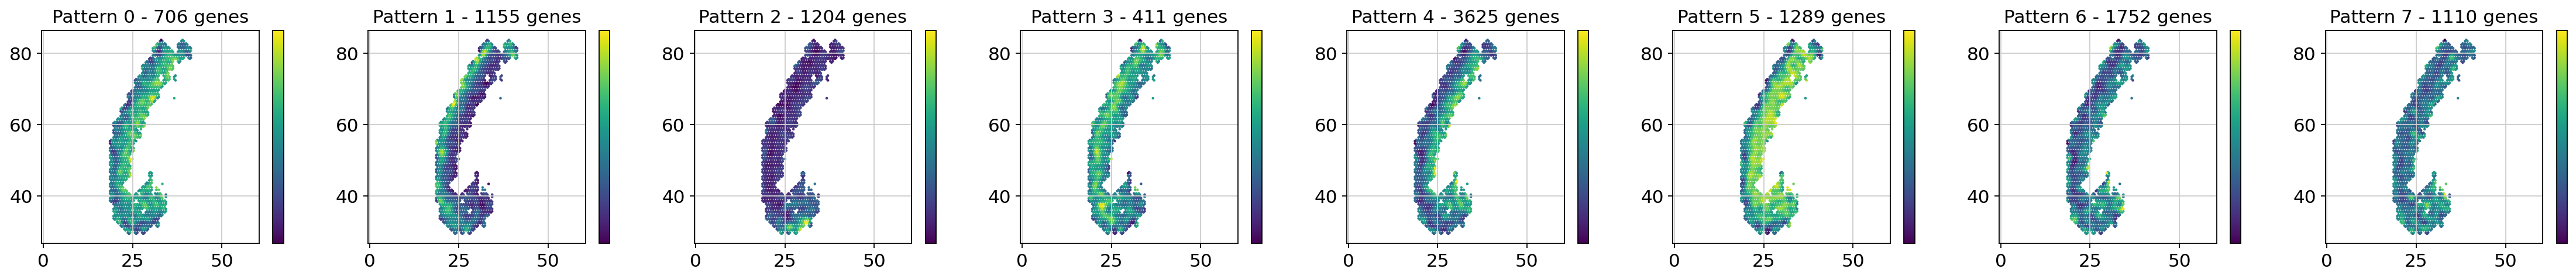

In [588]:
plt.figure(figsize=(35, 3))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.scatter(sample_info_sc[0], sample_info_sc[1], c=patterns_sc[i],s=1);
    plt.axis('equal')
    plt.title('Pattern {} - {} genes'.format(i, histology_results.query('pattern == @i').shape[0] ))
    plt.colorbar(ticks=[]);
plt.savefig("../4.6_spatial_pattern/spatialDE/4.8_pattern.pdf")

In [589]:
patterns_sc.columns="parttern" + patterns_sc.columns.astype("str")

In [610]:
patterns_sc.index = gingival_merge_subset.obs_names

In [611]:
gingival_merge_subset.obs[patterns_sc.columns]=np.nan
gingival_merge_subset.obs[patterns_sc.columns] = patterns_sc

In [657]:
gingival_merge_subset.obs

nCount_RNA  nFeature_RNA  percent.mt orig.ident     celltype  \
UCID0000     10067.0          3115    9.367239         D0          GE2   
UCID5752      9741.0          3024    3.481862  D3_K5_GFP  GE_keratini   
UCID0146     25819.0          4941    2.017894         D0          GE5   
UCID2407      4636.0          2424    3.313040  D3_K5_GFP  GE_keratini   
UCID2486     30940.0          4660    1.208791         D0          GE2   
...              ...           ...         ...        ...          ...   
UCID5960     17594.0          2756    0.363760         D0          GE4   
UCID5282     12385.0          3193    1.722133  D3_K5_GFP  GE_keratini   
UCID5859     35378.0          4123    0.920380  D0_K5_GFP  GE_keratini   
UCID5542     24596.0          3474    0.316203  D5_K5_GFP        GE_JE   
UCID6431     39176.0          3997    1.562181         D0          GE4   

                      idents  n_genes_by_counts  log1p_n_genes_by_counts  \
UCID0000  gingiva progenitor               2739                 7.915713   
UCID5752           cornified               3024                 8.014666   
UCID0146         basal layer               4360                 8.380457   
UCID2407         basal layer               2424                 7.793587   
UCID2486  gingiva progenitor               4095                 8.317766   
...                      ...                ...                      ...   
UCID5960     stratum corneum               2384                 7.776954   
UCID5282    spinous+granular               3192                 8.068716   
UCID5859     stratum corneum               4123                 8.324579   
UCID5542                 IBL               3474                 8.153350   
UCID6431     stratum corneum               3508                 8.163086   

          total_counts  log1p_total_counts  ...  pct_counts_in_top_500_genes  \
UCID0000        6603.0            8.795431  ...                    56.958958   
UCID5752        9741.0            9.184202  ...                    61.749307   
UCID0146       16290.0            9.698368  ...                    57.894414   
UCID2407        4636.0            8.441823  ...                    50.323555   
UCID2486       18843.0            9.843950  ...                    63.970705   
...                ...                 ...  ...                          ...   
UCID5960       13055.0            9.477003  ...                    78.284182   
UCID5282       12384.0            9.424241  ...                    69.089147   
UCID5859       35378.0           10.473874  ...                    75.970942   
UCID5542       24596.0           10.110380  ...                    77.150756   
UCID6431       28893.0           10.271389  ...                    77.433981   

                  point  parttern0  parttern1 parttern2  parttern3  parttern4  \
UCID0000  subspot_206.3  -0.048687  -0.085362 -0.198657   0.034252  -0.067630   
UCID5752   subspot_98.4  -0.126176   0.405736 -0.099904   0.024800  -0.251670   
UCID0146    subspot_1.1   0.172014  -0.231545  0.005340  -0.123107   0.367119   
UCID2407  subspot_384.2   0.131949  -0.232624 -0.026303  -0.037165   0.214719   
UCID2486  subspot_116.2   0.161537  -0.014842 -0.217719   0.247004   0.009819   
...                 ...        ...        ...       ...        ...        ...   
UCID5960  subspot_292.5  -0.154597   0.254842 -0.146904  -0.080250  -0.245493   
UCID5282  subspot_394.6  -0.062535  -0.141626 -0.240144   0.011192  -0.181005   
UCID5859  subspot_374.1  -0.099064   0.210406  0.060981  -0.064157  -0.173609   
UCID5542   subspot_60.5  -0.338347   0.077111  1.134896  -0.361792  -0.444541   
UCID6431  subspot_406.5  -0.249555   0.547280 -0.096916  -0.022057  -0.381534   

          parttern5  parttern6  parttern7  
UCID0000   0.049312  -0.124799  -0.096519  
UCID5752  -0.495776   0.000191   0.002794  
UCID0146   0.147133   0.298344   0.155546  
UCID2407   0.231481   0.075094  -0.009950  
UCID2486   0.235763  -0.011147  -0.007870  
...       

In [656]:
patterns_sc.columns

Index(['parttern0', 'parttern1', 'parttern2', 'parttern3', 'parttern4',
       'parttern5', 'parttern6', 'parttern7', 'point'],
      dtype='object')

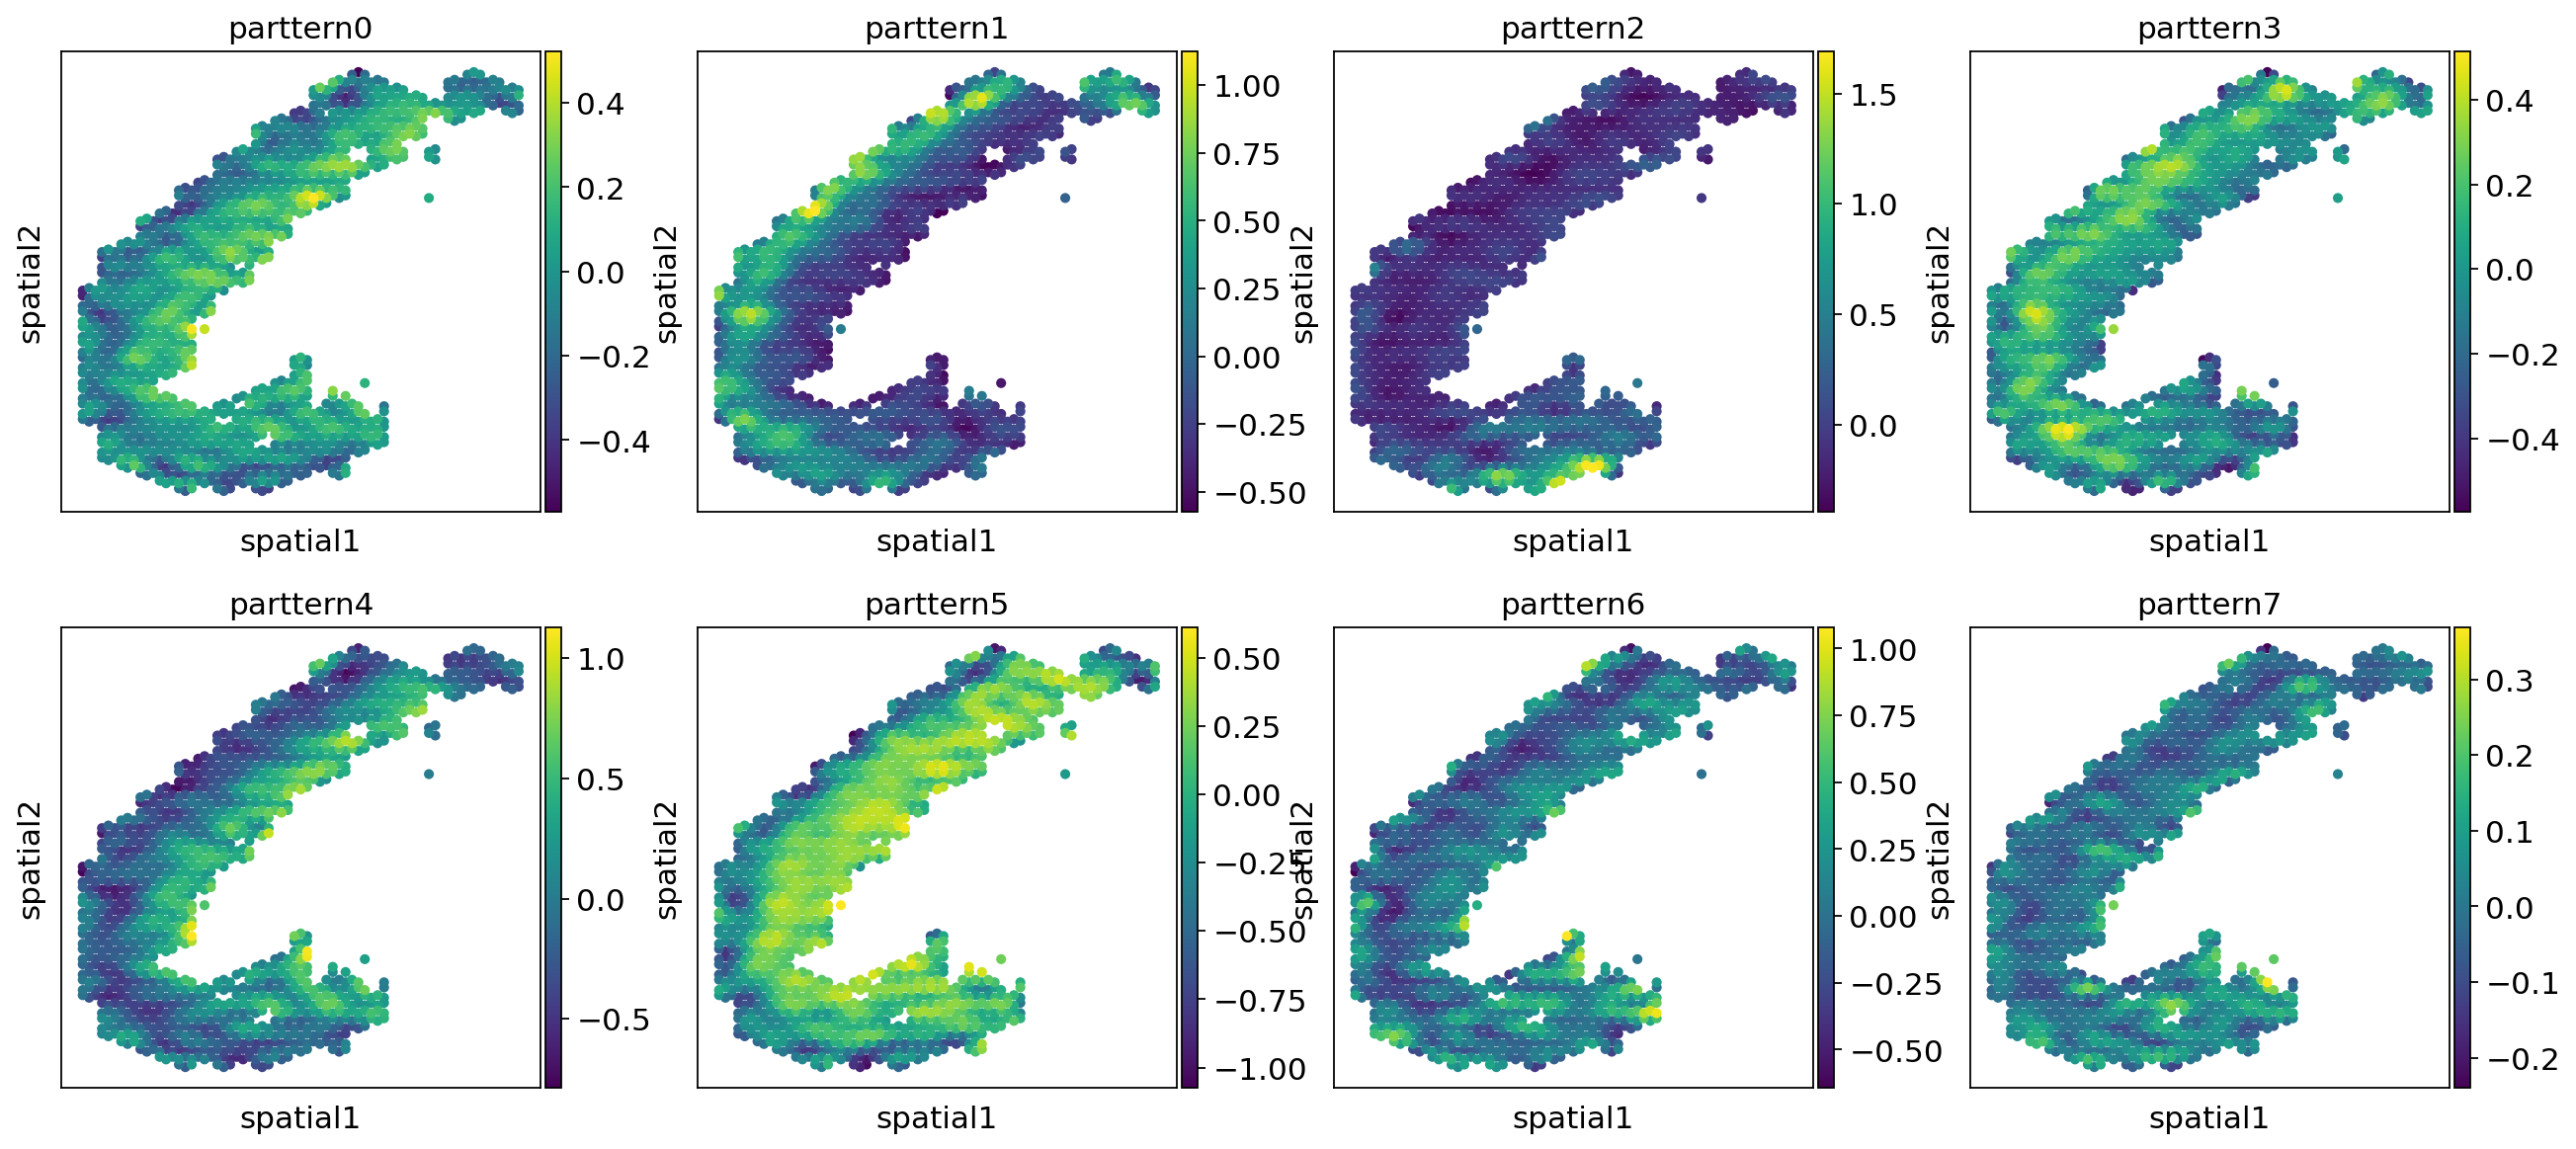

In [659]:
sc.pl.embedding(gingival_merge_subset,basis="spatial", color=['parttern0', 'parttern1', 'parttern2', 'parttern3', 'parttern4',
       'parttern5', 'parttern6', 'parttern7'],)


In [614]:

gingival_merge_subset.var[[histology_results_sc.columns]]=np.nan
gingival_merge_subset.var.loc[histology_results_sc.index,histology_results_sc.columns] =histology_results_sc

In [615]:
patterns_sc.index = gingival_merge_subset.obs["point"]

In [593]:
gingival_merge_subset

AnnData object with n_obs × n_vars = 1447 × 12787
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'orig.ident', 'celltype', 'idents', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'point', 'parttern0', 'parttern1', 'parttern2', 'parttern3', 'parttern4', 'parttern5', 'parttern6', 'parttern7'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'pattern', 'membership'
    obsm: 'spatial'
    layers: 'logcounts'

In [620]:
patterns_sc["point"] = patterns_sc.index

In [624]:
patterns_sc.index.name=""

In [625]:
patternLong =  pd.merge( gingival_merge.obs,patterns_sc, on=['point'], how='left')

In [646]:
patternLong.index =  gingival_merge.obs_names
gingival_merge.obs["point"] = patternLong["point"]

In [650]:
gingival_merge.obs[patterns_sc.columns] = patternLong[patterns_sc.columns]

In [651]:
 patternLong[patterns_sc.columns].index =  gingival_merge.obs_names
gingival_merge.obs[patterns_sc.columns] 

parttern0  parttern1  parttern2  parttern3  parttern4  parttern5  \
UCID0000  -0.048687  -0.085362  -0.198657   0.034252  -0.067630   0.049312   
UCID0001  -0.126176   0.405736  -0.099904   0.024800  -0.251670  -0.495776   
UCID0002   0.172014  -0.231545   0.005340  -0.123107   0.367119   0.147133   
UCID0003   0.131949  -0.232624  -0.026303  -0.037165   0.214719   0.231481   
UCID0004   0.161537  -0.014842  -0.217719   0.247004   0.009819   0.235763   
...             ...        ...        ...        ...        ...        ...   
UCID6523  -0.349339   0.851751  -0.183667  -0.007472  -0.528909  -0.610122   
UCID6524  -0.057934  -0.019625  -0.299023   0.220499  -0.236980   0.277263   
UCID6525   0.302954  -0.402368  -0.010334  -0.083280   0.581742   0.243714   
UCID6526  -0.301000   0.276406   0.954735  -0.144725  -0.406943  -0.644165   
UCID6527   0.083438  -0.387390   0.107027  -0.270315   0.378798   0.182495   

          parttern6  parttern7          point  
UCID0000  -0.124799  -0.096519  subspot_206.3  
UCID0001   0.000191   0.002794   subspot_98.4  
UCID0002   0.298344   0.155546    subspot_1.1  
UCID0003   0.075094  -0.009950  subspot_384.2  
UCID0004  -0.011147  -0.007870  subspot_116.2  
...             ...        ...            ...  
UCID6523  -0.329297  -0.066687   subspot_41.4  
UCID6524  -0.300544  -0.122436  subspot_409.6  
UCID6525   0.234462   0.061660  subspot_338.2  
UCID6526  -0.056290   0.027351  subspot_215.5  
UCID6527   0.350859   0.015258    subspot_5.4  

[13056 rows x 9 columns]

In [652]:
gingival_merge.obs

nCount_RNA  nFeature_RNA  percent.mt orig.ident      celltype  \
UCID0000     10067.0          3115    9.367239         D0           GE2   
UCID0001     13301.0          2510    6.841591         D0           GE4   
UCID0002      7941.0          2644   12.542501         D0           GE3   
UCID0003      2581.0           897   17.551337         D0           GE3   
UCID0004     27614.0          3668    4.867096         D0           GE2   
...              ...           ...         ...        ...           ...   
UCID6523     23964.0          3434    0.624623  D0_K5_GFP   GE_keratini   
UCID6524     22263.0          4454    1.006797  D5_K5_GFP   GE_keratini   
UCID6525     26629.0          5320    1.978408  D3_K5_GFP  GE_prolifer1   
UCID6526     13403.0          2394    0.346976  D0_K5_GFP         GE_JE   
UCID6527     28967.0          5294    2.215477  D3_K5_GFP  GE_prolifer1   

                      idents  n_genes_by_counts  log1p_n_genes_by_counts  \
UCID0000  gingiva progenitor               2739                 7.915713   
UCID0001           cornified               2188                 7.691200   
UCID0002         basal layer               2299                 7.740664   
UCID0003         basal layer                754                 6.626718   
UCID0004  gingiva progenitor               3163                 8.059592   
...                      ...                ...                      ...   
UCID6523     stratum corneum               3434                 8.141772   
UCID6524  gingiva progenitor               4454                 8.401782   
UCID6525         basal layer               5314                 8.578288   
UCID6526       JE_progenitor               2391                 7.779885   
UCID6527                 EBL               5287                 8.573195   

          total_counts  log1p_total_counts  ...  pct_counts_in_top_500_genes  \
UCID0000        6603.0            8.795431  ...                    56.958958   
UCID0001        8330.0            9.027739  ...                    75.750300   
UCID0002        4149.0            8.330864  ...                    51.072548   
UCID0003         962.0            6.870053  ...                    73.596674   
UCID0004       14966.0            9.613603  ...                    70.686890   
...                ...                 ...  ...                          ...   
UCID6523       23964.0           10.084350  ...                    77.036388   
UCID6524       22263.0           10.010726  ...                    63.540403   
UCID6525       26623.0           10.189568  ...                    49.633775   
UCID6526       13400.0            9.503085  ...                    78.126866   
UCID6527       28958.0           10.273636  ...                    52.952552   

                  point  parttern0  parttern1 parttern2  parttern3  parttern4  \
UCID0000  subspot_206.3  -0.048687  -0.085362 -0.198657   0.034252  -0.067630   
UCID0001   subspot_98.4  -0.126176   0.405736 -0.099904   0.024800  -0.251670   
UCID0002    subspot_1.1   0.172014  -0.231545  0.005340  -0.123107   0.367119   
UCID0003  subspot_384.2   0.131949  -0.232624 -0.026303  -0.037165   0.214719   
UCID0004  subspot_116.2   0.161537  -0.014842 -0.217719   0.247004   0.009819   
...                 ...        ...        ...       ...        ...        ...   
UCID6523   subspot_41.4  -0.349339   0.851751 -0.183667  -0.007472  -0.528909   
UCID6524  subspot_409.6  -0.057934  -0.019625 -0.299023   0.220499  -0.236980   
UCID6525  subspot_338.2   0.302954  -0.402368 -0.010334  -0.083280   0.581742   
UCID6526  subspot_215.5  -0.301000   0.276406  0.954735  -0.144725  -0.406943   
UCID6527    subspot_5.4   0.083438  -0.387390  0.107027  -0.270315   0.378798   

          parttern5  parttern6  parttern7  
UCID0000   0.049312  -0.124799  -0.096519  
UCID0001  -0.495776   0.000191   0.002794  
UCID0002   0.147133   0.298344   0.155546  
UCID0003   0.231481   0.075094  -0.009950  
UCID0004   0.235763  -0.011147  -0.007870 

In [649]:
patternLong

nCount_RNA  nFeature_RNA  percent.mt orig.ident      celltype  \
UCID0000     10067.0          3115    9.367239         D0           GE2   
UCID0001     13301.0          2510    6.841591         D0           GE4   
UCID0002      7941.0          2644   12.542501         D0           GE3   
UCID0003      2581.0           897   17.551337         D0           GE3   
UCID0004     27614.0          3668    4.867096         D0           GE2   
...              ...           ...         ...        ...           ...   
UCID6523     23964.0          3434    0.624623  D0_K5_GFP   GE_keratini   
UCID6524     22263.0          4454    1.006797  D5_K5_GFP   GE_keratini   
UCID6525     26629.0          5320    1.978408  D3_K5_GFP  GE_prolifer1   
UCID6526     13403.0          2394    0.346976  D0_K5_GFP         GE_JE   
UCID6527     28967.0          5294    2.215477  D3_K5_GFP  GE_prolifer1   

                      idents  n_genes_by_counts  log1p_n_genes_by_counts  \
UCID0000  gingiva progenitor               2739                 7.915713   
UCID0001           cornified               2188                 7.691200   
UCID0002         basal layer               2299                 7.740664   
UCID0003         basal layer                754                 6.626718   
UCID0004  gingiva progenitor               3163                 8.059592   
...                      ...                ...                      ...   
UCID6523     stratum corneum               3434                 8.141772   
UCID6524  gingiva progenitor               4454                 8.401782   
UCID6525         basal layer               5314                 8.578288   
UCID6526       JE_progenitor               2391                 7.779885   
UCID6527                 EBL               5287                 8.573195   

          total_counts  log1p_total_counts  ...  pct_counts_in_top_500_genes  \
UCID0000        6603.0            8.795431  ...                    56.958958   
UCID0001        8330.0            9.027739  ...                    75.750300   
UCID0002        4149.0            8.330864  ...                    51.072548   
UCID0003         962.0            6.870053  ...                    73.596674   
UCID0004       14966.0            9.613603  ...                    70.686890   
...                ...                 ...  ...                          ...   
UCID6523       23964.0           10.084350  ...                    77.036388   
UCID6524       22263.0           10.010726  ...                    63.540403   
UCID6525       26623.0           10.189568  ...                    49.633775   
UCID6526       13400.0            9.503085  ...                    78.126866   
UCID6527       28958.0           10.273636  ...                    52.952552   

                  point  parttern0  parttern1 parttern2  parttern3  parttern4  \
UCID0000  subspot_206.3  -0.048687  -0.085362 -0.198657   0.034252  -0.067630   
UCID0001   subspot_98.4  -0.126176   0.405736 -0.099904   0.024800  -0.251670   
UCID0002    subspot_1.1   0.172014  -0.231545  0.005340  -0.123107   0.367119   
UCID0003  subspot_384.2   0.131949  -0.232624 -0.026303  -0.037165   0.214719   
UCID0004  subspot_116.2   0.161537  -0.014842 -0.217719   0.247004   0.009819   
...                 ...        ...        ...       ...        ...        ...   
UCID6523   subspot_41.4  -0.349339   0.851751 -0.183667  -0.007472  -0.528909   
UCID6524  subspot_409.6  -0.057934  -0.019625 -0.299023   0.220499  -0.236980   
UCID6525  subspot_338.2   0.302954  -0.402368 -0.010334  -0.083280   0.581742   
UCID6526  subspot_215.5  -0.301000   0.276406  0.954735  -0.144725  -0.406943   
UCID6527    subspot_5.4   0.083438  -0.387390  0.107027  -0.270315   0.378798   

          parttern5  parttern6  parttern7  
UCID0000   0.049312  -0.124799  -0.096519  
UCID0001  -0.495776   0.000191   0.002794  
UCID0002   0.147133   0.298344   0.155546  
UCID0003   0.231481   0.075094  -0.009950  
UCID0004   0.235763  -0.011147  -0.007870 

In [643]:
patterns_sc

parttern0  parttern1  parttern2  parttern3  parttern4  \
                                                                       
subspot_206.3  -0.048687  -0.085362  -0.198657   0.034252  -0.067630   
subspot_98.4   -0.126176   0.405736  -0.099904   0.024800  -0.251670   
subspot_1.1     0.172014  -0.231545   0.005340  -0.123107   0.367119   
subspot_384.2   0.131949  -0.232624  -0.026303  -0.037165   0.214719   
subspot_116.2   0.161537  -0.014842  -0.217719   0.247004   0.009819   
...                  ...        ...        ...        ...        ...   
subspot_292.5  -0.154597   0.254842  -0.146904  -0.080250  -0.245493   
subspot_394.6  -0.062535  -0.141626  -0.240144   0.011192  -0.181005   
subspot_374.1  -0.099064   0.210406   0.060981  -0.064157  -0.173609   
subspot_60.5   -0.338347   0.077111   1.134896  -0.361792  -0.444541   
subspot_406.5  -0.249555   0.547280  -0.096916  -0.022057  -0.381534   

               parttern5  parttern6  parttern7          point  
                                                               
subspot_206.3   0.049312  -0.124799  -0.096519  subspot_206.3  
subspot_98.4   -0.495776   0.000191   0.002794   subspot_98.4  
subspot_1.1     0.147133   0.298344   0.155546    subspot_1.1  
subspot_384.2   0.231481   0.075094  -0.009950  subspot_384.2  
subspot_116.2   0.235763  -0.011147  -0.007870  subspot_116.2  
...                  ...        ...        ...            ...  
subspot_292.5  -0.468279   0.051087  -0.032353  subspot_292.5  
subspot_394.6   0.091014  -0.194470  -0.094717  subspot_394.6  
subspot_374.1  -0.553063   0.195685   0.028248  subspot_374.1  
subspot_60.5   -0.878258   0.062063   0.066778   subspot_60.5  
subspot_406.5  -0.618505  -0.149583  -0.022062  subspot_406.5  

[1447 rows x 9 columns]

In [631]:
gingival_merge.var = gingival_merge_subset.var

In [630]:
gingival_merge_subset

AnnData object with n_obs × n_vars = 1447 × 12787
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'orig.ident', 'celltype', 'idents', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'point', 'parttern0', 'parttern1', 'parttern2', 'parttern3', 'parttern4', 'parttern5', 'parttern6', 'parttern7'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'pattern', 'membership'
    obsm: 'spatial'
    layers: 'logcounts'

In [635]:
gingival_merge

AnnData object with n_obs × n_vars = 13056 × 12787
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'orig.ident', 'celltype', 'idents', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'point', 'parttern0', 'parttern1', 'parttern2', 'parttern3', 'parttern4', 'parttern5', 'parttern6', 'parttern7'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'pattern', 'membership'
    obsm: 'spatial'
    layers: 'logcounts'

In [653]:
gingival_merge.write_h5ad("../important_processed_data/4.7_scMerge.h5ad")

In [648]:
gingival_merge.obs

nCount_RNA  nFeature_RNA  percent.mt orig.ident      celltype  \
UCID0000     10067.0          3115    9.367239         D0           GE2   
UCID0001     13301.0          2510    6.841591         D0           GE4   
UCID0002      7941.0          2644   12.542501         D0           GE3   
UCID0003      2581.0           897   17.551337         D0           GE3   
UCID0004     27614.0          3668    4.867096         D0           GE2   
...              ...           ...         ...        ...           ...   
UCID6523     23964.0          3434    0.624623  D0_K5_GFP   GE_keratini   
UCID6524     22263.0          4454    1.006797  D5_K5_GFP   GE_keratini   
UCID6525     26629.0          5320    1.978408  D3_K5_GFP  GE_prolifer1   
UCID6526     13403.0          2394    0.346976  D0_K5_GFP         GE_JE   
UCID6527     28967.0          5294    2.215477  D3_K5_GFP  GE_prolifer1   

                      idents  n_genes_by_counts  log1p_n_genes_by_counts  \
UCID0000  gingiva progenitor               2739                 7.915713   
UCID0001           cornified               2188                 7.691200   
UCID0002         basal layer               2299                 7.740664   
UCID0003         basal layer                754                 6.626718   
UCID0004  gingiva progenitor               3163                 8.059592   
...                      ...                ...                      ...   
UCID6523     stratum corneum               3434                 8.141772   
UCID6524  gingiva progenitor               4454                 8.401782   
UCID6525         basal layer               5314                 8.578288   
UCID6526       JE_progenitor               2391                 7.779885   
UCID6527                 EBL               5287                 8.573195   

          total_counts  log1p_total_counts  ...  pct_counts_in_top_500_genes  \
UCID0000        6603.0            8.795431  ...                    56.958958   
UCID0001        8330.0            9.027739  ...                    75.750300   
UCID0002        4149.0            8.330864  ...                    51.072548   
UCID0003         962.0            6.870053  ...                    73.596674   
UCID0004       14966.0            9.613603  ...                    70.686890   
...                ...                 ...  ...                          ...   
UCID6523       23964.0           10.084350  ...                    77.036388   
UCID6524       22263.0           10.010726  ...                    63.540403   
UCID6525       26623.0           10.189568  ...                    49.633775   
UCID6526       13400.0            9.503085  ...                    78.126866   
UCID6527       28958.0           10.273636  ...                    52.952552   

                  point  parttern0  parttern1 parttern2  parttern3  parttern4  \
UCID0000  subspot_206.3        NaN        NaN       NaN        NaN        NaN   
UCID0001   subspot_98.4        NaN        NaN       NaN        NaN        NaN   
UCID0002    subspot_1.1        NaN        NaN       NaN        NaN        NaN   
UCID0003  subspot_384.2        NaN        NaN       NaN        NaN        NaN   
UCID0004  subspot_116.2        NaN        NaN       NaN        NaN        NaN   
...                 ...        ...        ...       ...        ...        ...   
UCID6523   subspot_41.4        NaN        NaN       NaN        NaN        NaN   
UCID6524  subspot_409.6        NaN        NaN       NaN        NaN        NaN   
UCID6525  subspot_338.2        NaN        NaN       NaN        NaN        NaN   
UCID6526  subspot_215.5        NaN        NaN       NaN        NaN        NaN   
UCID6527    subspot_5.4        NaN        NaN       NaN        NaN        NaN   

          parttern5  parttern6  parttern7  
UCID0000        NaN        NaN        NaN  
UCID0001        NaN        NaN        NaN  
UCID0002        NaN        NaN        NaN  
UCID0003        NaN        NaN        NaN  
UCID0004        NaN        NaN        NaN 